## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

## Data Preprocessing

In [ ]:
df = pd.read_csv('/content/original_data.csv')

In [ ]:
# Converted time_stamp to datetime
df.index = df['time_stamp'].values
df = df.sort_index()
df.index = pd.to_datetime(df.index, format='%m/%d/%Y %H:%M')
df = df.sort_index()
del df['time_stamp']
df = df[(df['s22']==2) | (df['s22']==3) | (df['s22']==4) | (df['s22']==5) | (df['s22']==7)]

In [ ]:
# Replaced 0 engine speed by Nan values and removed rows with null values
df.loc[df['s8']==0, 's8'] = np.nan
df.dropna(subset = ['s8'], inplace=True)

In [ ]:
# Replaced 0 exhaust mass flow by Nan values and removed rows with null values
df.loc[df['s9']==0, 's9'] = np.nan
df.dropna(subset = ['s9'], inplace=True)

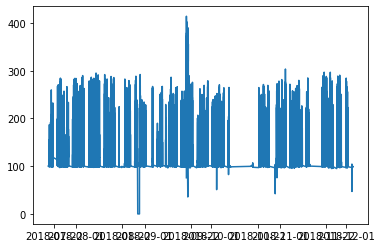

In [ ]:
# Removed outliers from boost pressure (s4)
plt.plot(df['s4'])
df = df[(df['s4']>90) & (df['s4']<280)]

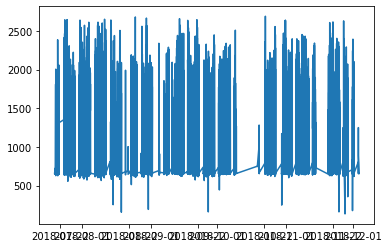

In [ ]:
# Removed outliers from engine speed (s8)
plt.plot(df['s8'])
df = df[(df['s8']>500)]

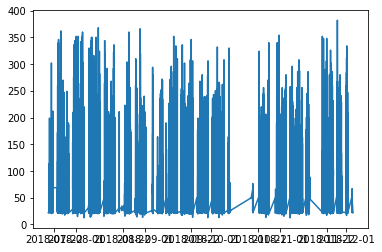

In [ ]:
# Removed outliers from exhaust mass flow (s9)
plt.plot(df['s9'])
df = df[(df['s9']>10)]

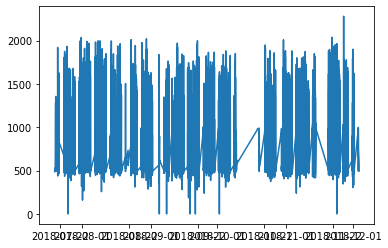

In [ ]:
# Removed outliers from mass air flow (s11)
plt.plot(df['s11'])
df = df[(df['s11']>350) &(df['s11']<5000)]

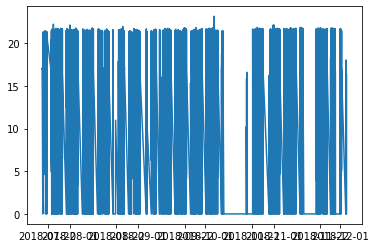

In [ ]:
# Removed outliers from o2 conc (s12)
plt.plot(df['s12'])
df = df[(df['s12']>3)]

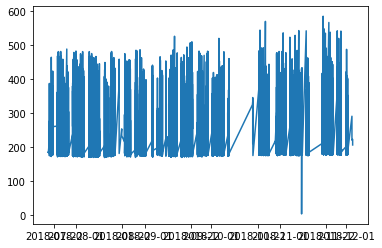

In [ ]:

# Removed outliers from oil pressure (s13)
plt.plot(df['s13'])
df = df[df['s13']>160]

In [ ]:
# # if life (s21) is 0, replace it with null value
# df.loc[df['s21']==0, 's21'] = np.nan

In [ ]:
# # Fill the missing value in the dataframe
# df = df.ffill(axis = 0)

In [ ]:
# # Engine Speed
# print(min(df['s8']),"-",max(df['s8']))

In [ ]:
# # Engine Torque
# print(min(df['s7']),"-",max(df['s7']))

In [ ]:
# plt.figure(figsize=(16,6) )
# plt.ylabel('Value Counts')
# plt.xlabel('Range')
# plt.title('Engine Torque (s7)')
# df['s7'].value_counts(bins=10).plot(kind='bar')

In [ ]:
# plt.figure(figsize=(16,6) )
# plt.ylabel('Value Counts')
# plt.xlabel('Range')
# plt.title('Engine Torque (s7)')
# df['s8'].value_counts(bins=10).plot(kind='bar')

In [ ]:
# print(min(df['s7']),max(df['s7']))

In [ ]:
# s8_bin_len = (max(df['s8'])-min(df['s8']))/10
# s7_bin_len = (max(df['s7'])-min(df['s7']))/10

In [ ]:
# print(s8_bin_len,s7_bin_len)

In [ ]:
# df['s8'][685]

In [ ]:
# df['s8'][685]//s8_bin_len

In [ ]:
# for i in range(11):
#   print(s7_bin_len*i)

In [ ]:
# df['s8'].value_counts(bins=10)

In [ ]:
# df["s8_range"] = pd.cut(df["s8"], [509.821,729.8,947.6,1165.4,1383.2,1601.0,1818.8,2036.6,2254.4,2472.2,2690.0],
#                          labels=[1,2,3,4,5,6,7,8,9,10])

In [ ]:
# df['s7'].value_counts(bins=10)

In [ ]:
# df["s7_range"] = pd.cut(df["s7"], [-158.106,-46.5,64.0,174.5,285.0,395.5,506.0,616.5,727.0,837.5,948.0],
#                          labels=[1,2,3,4,5,6,7,8,9,10])

In [ ]:
# df["s7_range"].value_counts()

In [ ]:
# df["s8_range"].value_counts()

In [ ]:
# coord = [[0]*11]*11
# coord

In [ ]:
# # coord = [[0]*11]*11
# coord = np.zeros((11, 11)) 
# for i in range(1,11):
#   # print(i)
#   for j in range(1,11):
#     # print(i,j)
#     coord[i][j] = len(df[(df['s7_range']==i) & (df['s8_range']==j)])

In [ ]:
# coord = pd.DataFrame(coord)

In [ ]:
# coord.rename(columns = {0:'0',1:'(509.821, 729.8]',2:'(729.8, 947.6]',3:'(947.6, 1165.4]',
#                      4:'(1165.4, 1383.2]',5:'(1383.2, 1601.0]',6:'(1601.0, 1818.8]',
#                      7:'(1818.8, 2036.6]',8:'(2036.6, 2254.4]',9:'(2254.4, 2472.2]',
#                      10:'(2472.2, 2690.0]'}, inplace = True)

In [ ]:
# coord.drop(['0'],axis=1,inplace=True)

In [ ]:
# coord.rename(index = {0:'0',1:'(-158.106, -46.5] ',2:'(-46.5, 64.0] ',3:'(64.0, 174.5]',
#                      4:'(174.5, 285.0]',5:'(285.0, 395.5]',6:'(395.5, 506.0]',
#                      7:'(506.0, 616.5]',8:'(616.5, 727.0]',9:'(727.0, 837.5]',
#                      10:'(837.5, 948.0]'}, inplace = True)

In [ ]:
# coord.drop(['0'],axis=0,inplace=True)

In [ ]:
# coord

In [ ]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# # plt.xlabel("")
# ax = sns.heatmap(coord,linewidths=.5,cmap="YlGnBu")
# ax.set(xlabel='Engine Speed (s8)', ylabel='Engine Torque (s7)')

In [ ]:
# df1 = df[(df['s7']>-157) & (df['s7']<175) & (df['s8']>509) & (df['s8']<729.8)]

In [ ]:
# df1.drop(['s18_range', 's8_range', 's7_range'],axis=1,inplace=True)

In [ ]:
########################

In [ ]:

combined = df[['s2','s3','s4','s5','s6','s9','s11','s12','s13','s15','s21']].copy()
scaler = preprocessing.MinMaxScaler()
combined = pd.DataFrame(scaler.fit_transform(combined), columns=combined.columns, index=combined.index)

In [ ]:
sd = pd.DataFrame(index=combined.index)
sd= combined
sd['s17'] = df['s17']
sd['s21'] = combined['s21']
sd['s22'] = df['s22']

## Features Selection

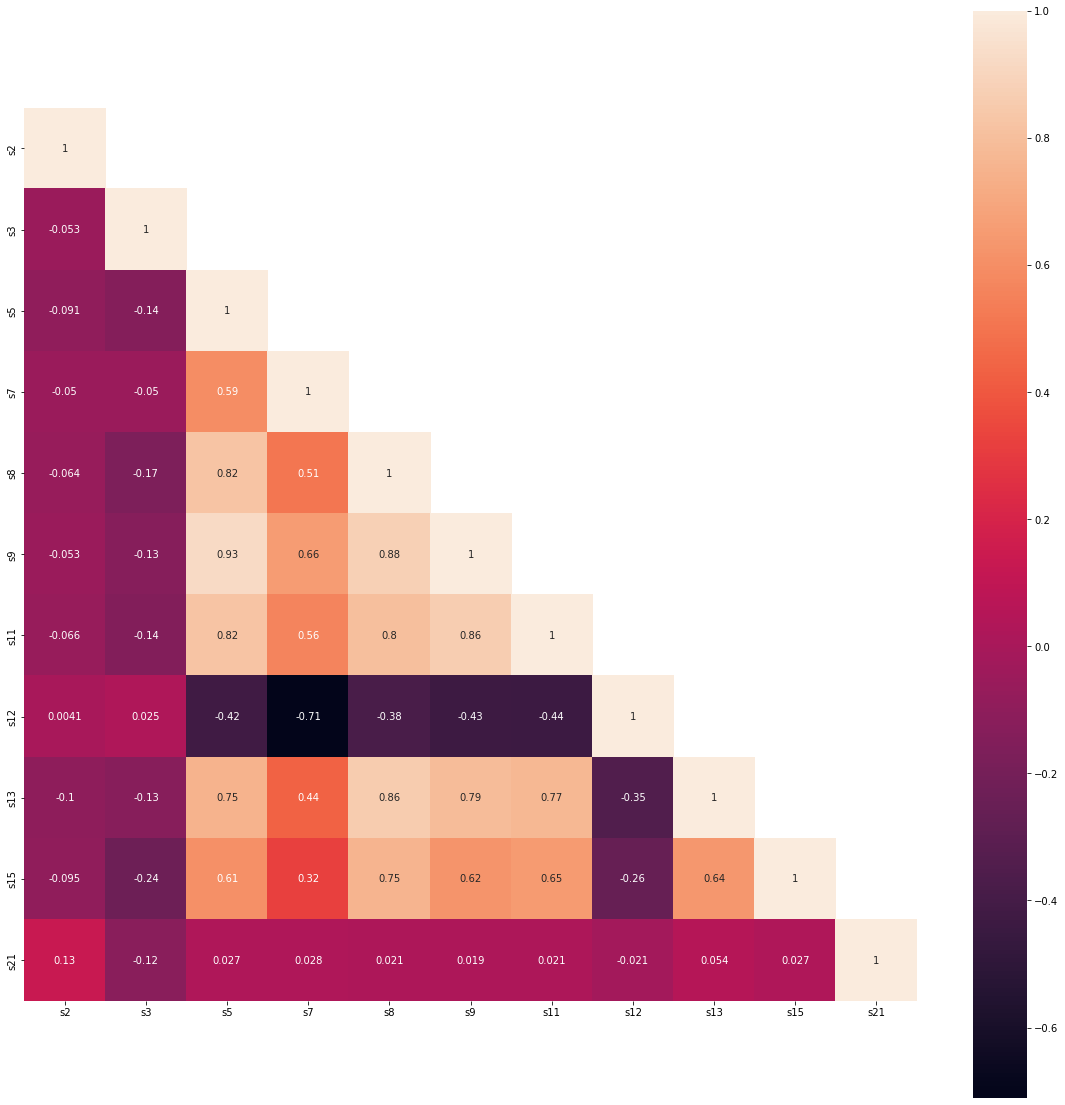

In [ ]:
df_cat = pd.get_dummies(df[['s2', 's3', 's5', 's7', 's8', 's9', 's11', 's12', 's13', 's15', 's21']])
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,20)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

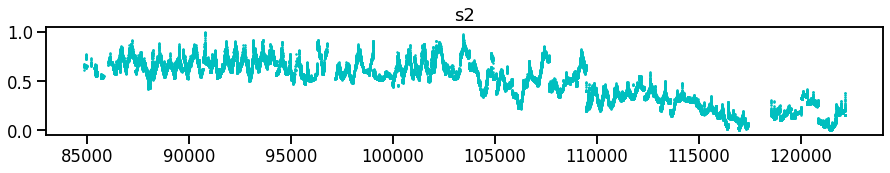

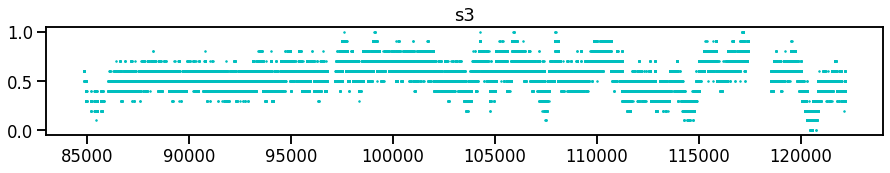

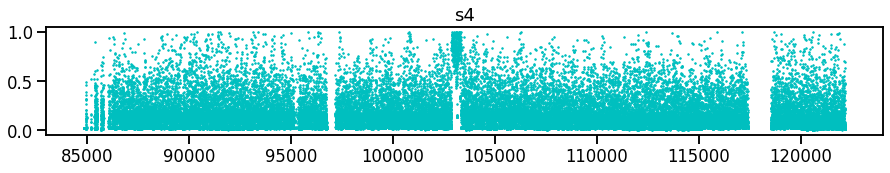

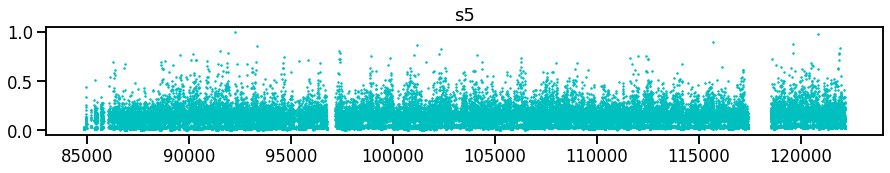

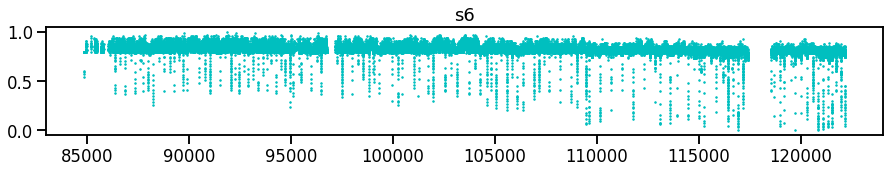

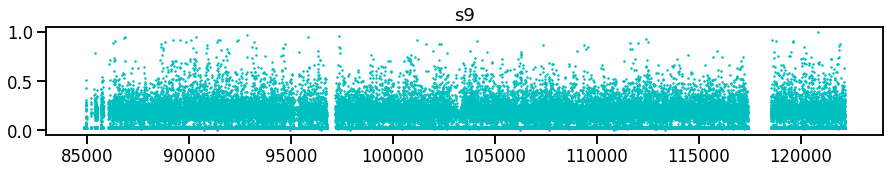

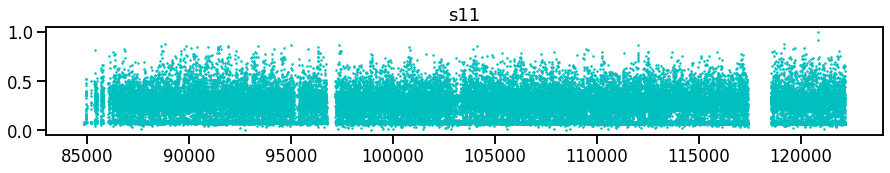

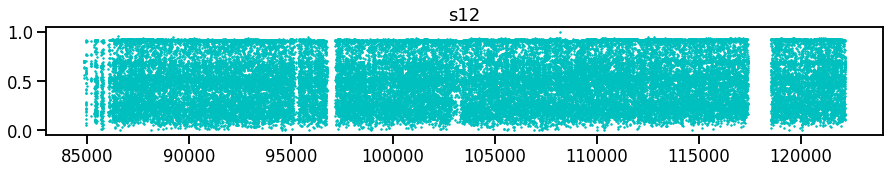

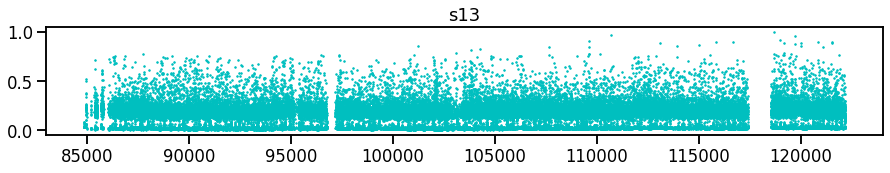

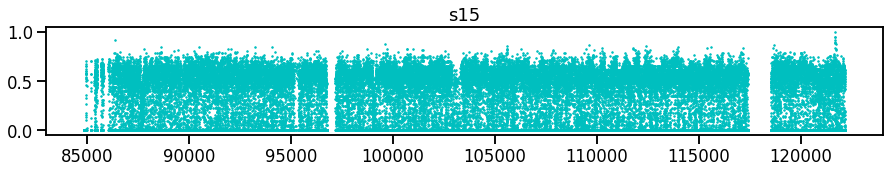

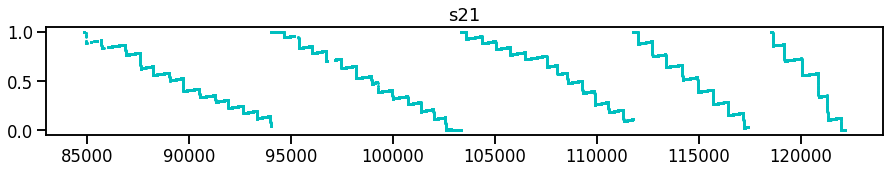

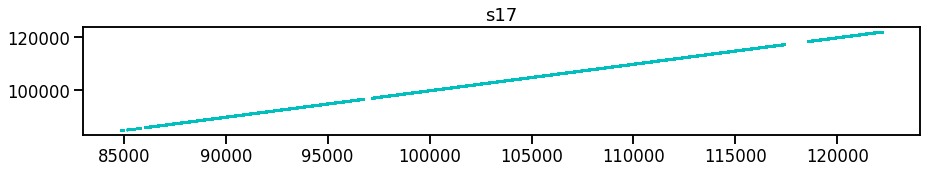

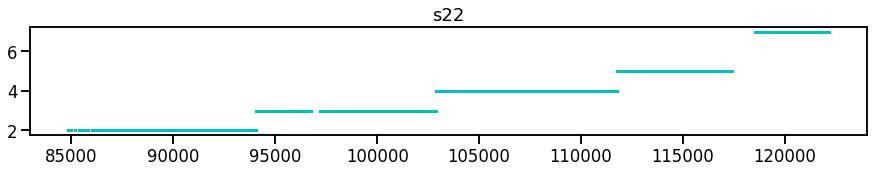

In [ ]:
names = sd.columns
for name in names:
    sns.set_context('talk')
    plt.figure(figsize=(15,2))
    plt.plot(sd['s17'].values, sd[name].values, '.c', markersize=3)
    plt.title(name)
    plt.show()

Text(0, 0.5, 'Oil life')

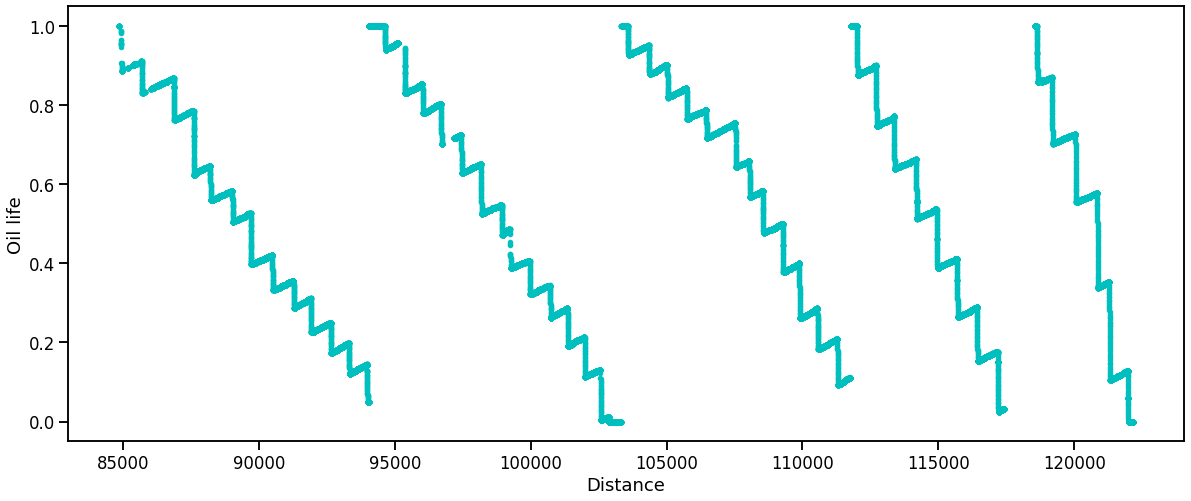

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(sd['s17'].values, sd['s21'].values, '.c')
plt.xlabel('Distance')
plt.ylabel('Oil life')

## Variational Autoencoder

In [ ]:
sd['s22'].value_counts()

4    13058
3    12284
2    11979
5     8229
7     4974
Name: s22, dtype: int64

In [ ]:
# considering on 2nd and 3rd cycle
sd_t = sd[(sd['s22']==2) | (sd['s22']==3)]

In [ ]:
sd_t.shape

(24263, 13)

In [ ]:
timestep = 1


#training set
xt = np.array(sd_t[ sd_t['s21']>0.8 ].drop(['s17','s21','s22'], axis=1)) # Training Data
xt = xt.reshape((xt.shape[0],timestep, xt.shape[1]))
#test set
xtt = np.array(sd_t.drop(['s17','s21','s22'], axis=1))
xtt = xtt.reshape((xtt.shape[0],timestep, xtt.shape[1]))

In [ ]:
sd_t

,s2,s3,s4,s5,s6,s9,s11,s12,s13,s15,s21,s17,s22
2018-07-19 13:07:00,0.643564,0.6,0.020550,0.016493,0.793651,0.025207,0.070409,0.694840,0.039687,0.0,1.000000,84845.96875,2
2018-07-19 13:08:00,0.653465,0.6,0.020948,0.015516,0.793651,0.024869,0.071423,0.695385,0.040289,0.0,1.000000,84845.96875,2
2018-07-19 13:09:00,0.653465,0.6,0.020749,0.015951,0.793651,0.024531,0.069411,0.695833,0.039086,0.0,1.000000,84845.96875,2
2018-07-19 13:10:00,0.653465,0.6,0.021148,0.015299,0.793651,0.024869,0.069533,0.696494,0.037883,0.0,1.000000,84845.96875,2
2018-07-19 13:11:00,0.653465,0.6,0.021148,0.017253,0.793651,0.024531,0.068671,0.696517,0.037583,0.0,1.000000,84845.96875,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-19 03:32:00,0.584158,0.5,0.021264,0.022244,0.809524,0.024531,0.072073,0.687378,0.031419,0.0,0.011506,102868.07810,3
2018-09-19 03:33:00,0.594059,0.5,0.020866,0.021810,0.809524,0.024531,0.067134,0.687765,0.030667,0.0,0.011536,102868.07810,3
2018-09-19 03:34:00,0.594059,0.6,0.020667,0.021376,0.809524,0.024192,0.070021,0.697255,0.029465,0.0,0.011536,102868.07810,3
2018-09-19 03:35:00,0.594059,0.6,0.020866,0.020399,0.809524,0.024869,0.071102,0.700020,0.029615,0.0,0.011567,102868.07810,3


In [ ]:
from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras import metrics
from keras import backend as K
from keras.models import Model, Sequential, load_model

batch_size = 256
original_shape = xt.shape[1:]
original_dim = np.prod(original_shape)
latent_dim = 4
intermediate_dim = 128
final_dim = 64
epochs = 50
epsilon_std = 1.0


in_layer = Input(shape=original_shape)
x = Flatten()(in_layer)
h = Dense(intermediate_dim, activation='relu')(x)
h = Dense(final_dim, activation = 'relu')(h)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_f = Dense(final_dim, activation='relu')
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')

f_decoded = decoder_f(z)
h_decoded = decoder_h(f_decoded)
x_decoded_mean = decoder_mean(h_decoded)
x_decoded_img = Reshape(original_shape)(x_decoded_mean)

# instantiate VAE model
vae = Model(in_layer, x_decoded_img)

# Compute VAE loss
xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 10)]      0           []                               
                                                                                                  
 flatten (Flatten)              (None, 10)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          1408        ['flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                              

In [ ]:
history = vae.fit(xt,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(xt, None))

Epoch 1/50
18/18 [==============================] - 2s 22ms/step - loss: 6.0285 - val_loss: 5.5070
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 5.4015 - val_loss: 5.4067
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 5.3802 - val_loss: 5.4048
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 5.3637 - val_loss: 5.3900
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 5.3686 - val_loss: 5.3817
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 5.3553 - val_loss: 5.3710
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 5.3379 - val_loss: 5.3707
Epoch 8/50
18/18 [==============================] - 0s 7ms/step - loss: 5.3325 - val_loss: 5.3589
Epoch 9/50
18/18 [==============================] - 0s 9ms/step - loss: 5.3092 - val_loss: 5.3695
Epoch 10/50
18/18 [==============================] - 0s 7ms/step - loss: 5.3365 - val_loss: 5.3557
Epoch 11/50
18/18 

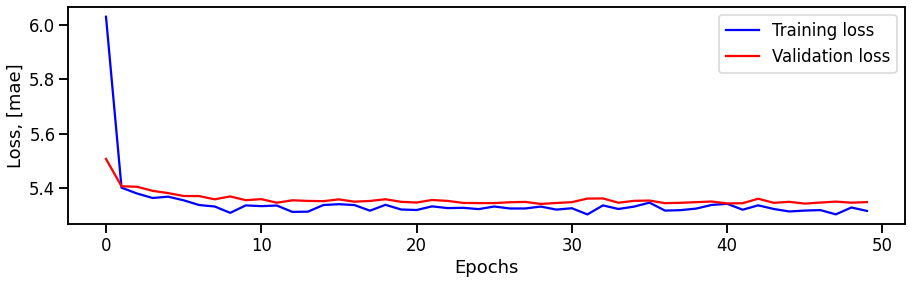

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mae]')
# plt.ylim([0,.003])
plt.show()

In [ ]:
model = vae

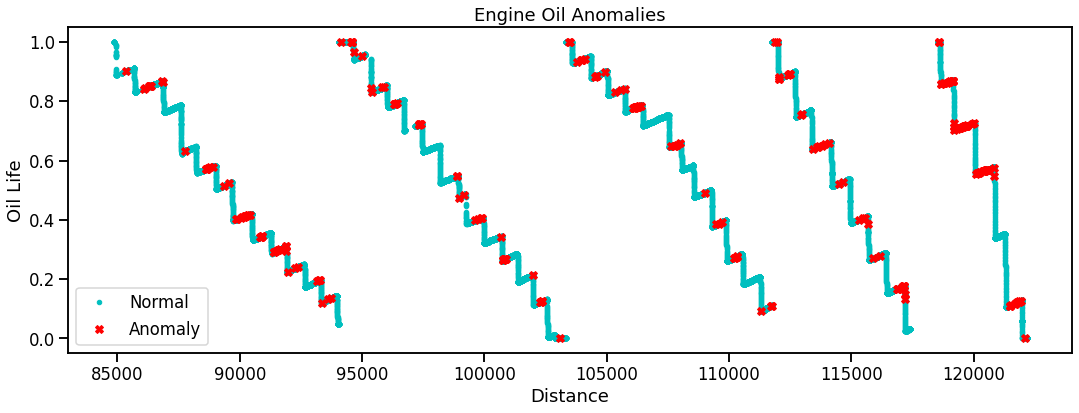

In [ ]:
X_test1 = sd.copy()
xtt = np.array(sd.drop(['s17','s21','s22'], axis=1))
xtt = xtt.reshape((xtt.shape[0],timestep, xtt.shape[1])) # Testing Data reshaped

X_pred = model.predict(xtt)
X_pred = X_pred.reshape((xtt.shape[0], xtt.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd['s17'], sd['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd.loc[idx]['s17'], sd.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show()

In [ ]:
scored['Loss_mae'].nlargest(int(0.05*scored.shape[0]))[-1]

0.21436244597201554

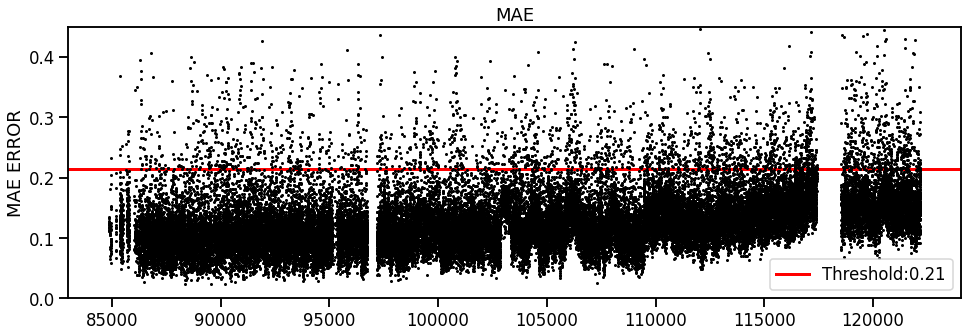

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.45)
threshold = scored['Loss_mae'].nlargest(int(0.05*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.plot(sd['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('MAE')
plt.legend()

### 2nd cycle

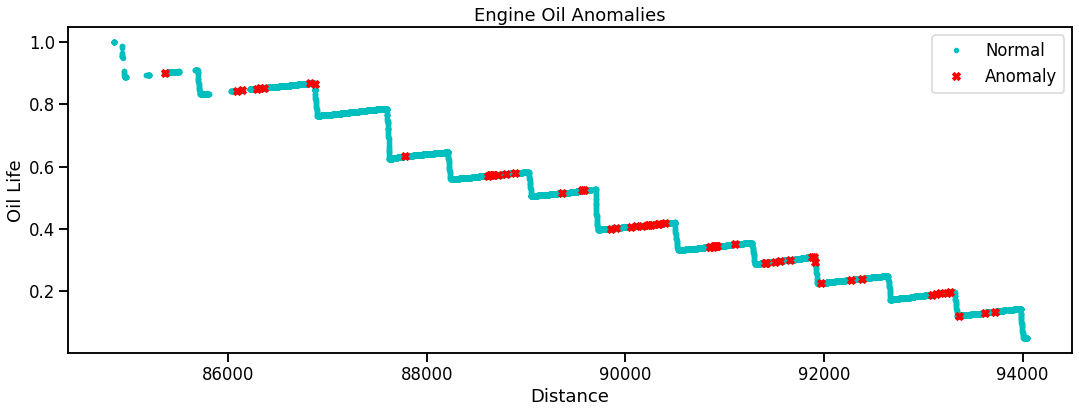

In [ ]:
sd2 = sd[(sd['s22']==2)] 

X_test1 = sd2.copy()
xtt3 = np.array(sd2.drop(['s17','s21','s22'], axis=1))
xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd2['s17'], sd2['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd2.loc[idx]['s17'], sd2.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

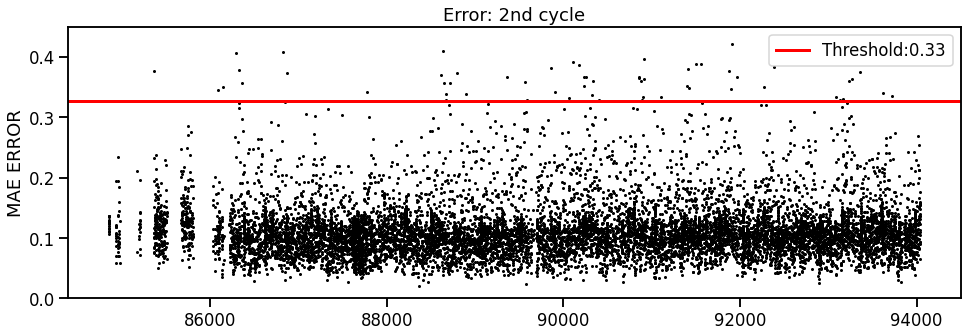

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(sd2['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylim(0.0,0.45)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')
plt.legend()

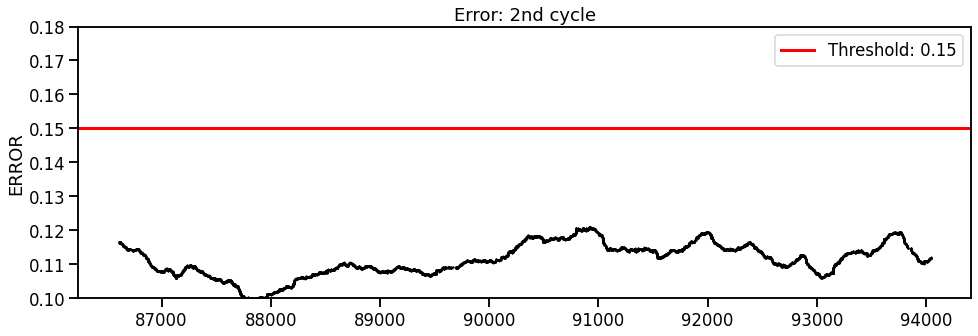

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.10,0.18)
plt.axhline(y=0.15, linewidth=3, label= 'Threshold: 0.15', color = 'r')
plt.plot(sd2['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 2nd cycle')
plt.legend()

### 3rd cycle

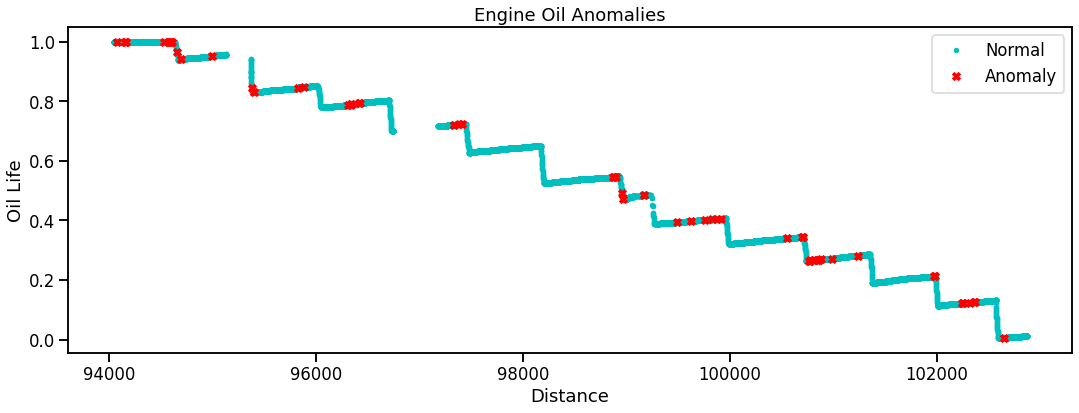

In [ ]:
sd3 = sd[(sd['s22']==3)]
timestep = 1

X_test1 = sd3.copy()
xtt3 = np.array(sd3.drop(['s17','s21','s22'], axis=1))
xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd3['s17'], sd3['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd3.loc[idx]['s17'], sd3.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

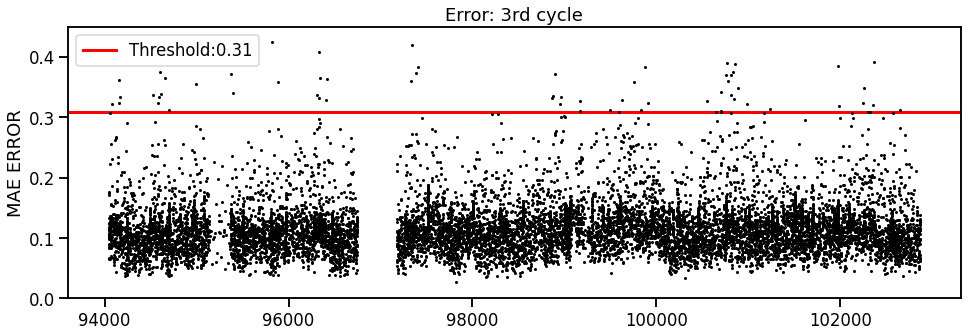

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.45)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
# plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error: 3rd cycle')
plt.legend()

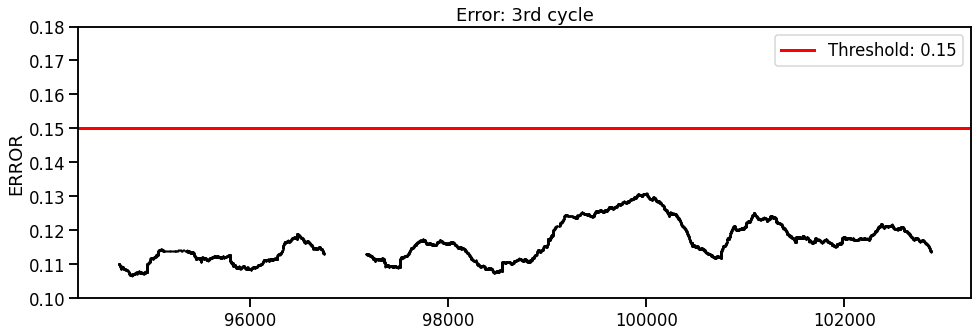

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.10,0.18)
plt.axhline(y=0.15, linewidth=3, label= 'Threshold: 0.15', color = 'r')
plt.plot(sd3['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 3rd cycle')
plt.legend()

### 4th cycle

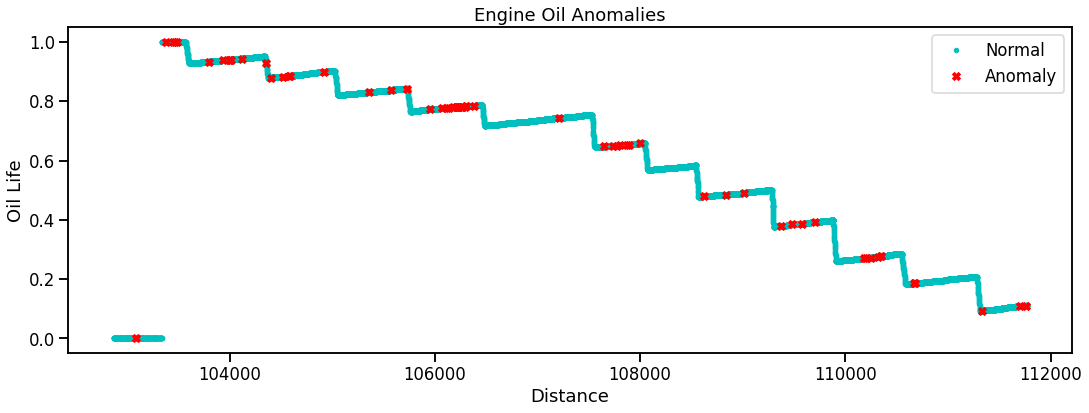

In [ ]:
sd4 = sd[sd['s22']==4]
X_test1 = sd4.copy()
xtt1 = np.array(sd4.drop(['s17','s21','s22'], axis=1))
xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd4['s17'], sd4['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd4.loc[idx]['s17'], sd4.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

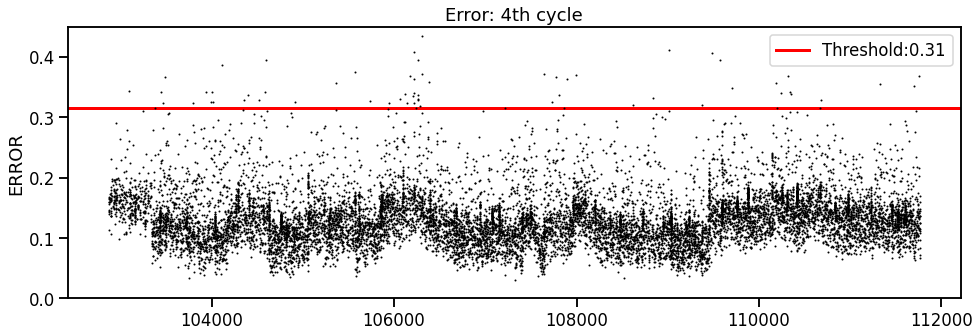

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.45)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')

plt.plot(sd4['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 4th cycle')
plt.legend()

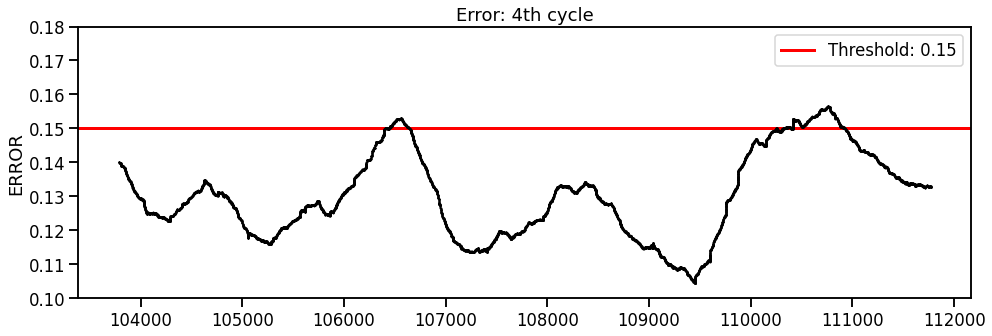

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.10,0.18)
plt.axhline(y=0.15, linewidth=3, label= 'Threshold: 0.15', color = 'r')
plt.plot(sd4['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 4th cycle')
plt.legend()

### 5th cycle

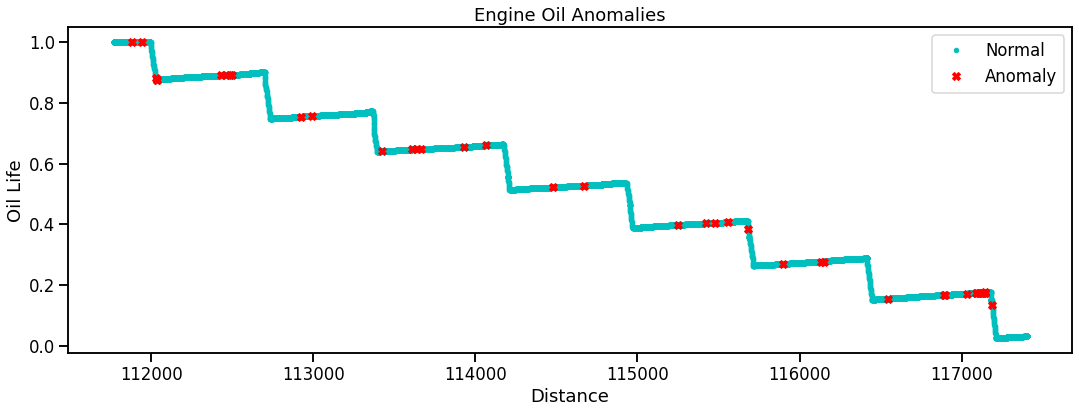

In [ ]:
sd5 = sd[sd['s22']==5]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

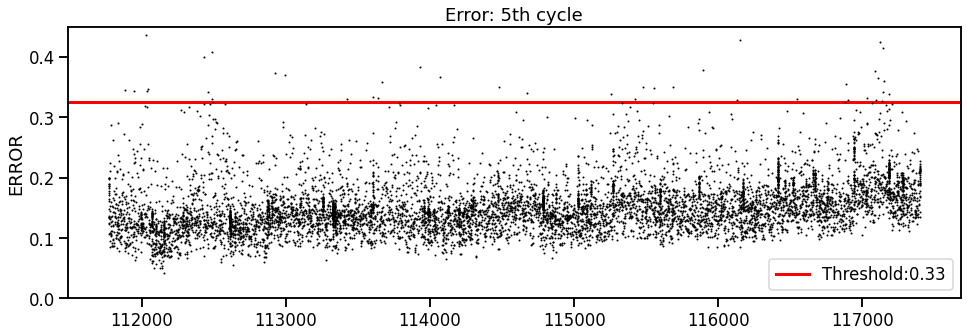

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.45)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 5th cycle')
plt.legend()

Text(0.5, 1.0, 'Error: 5th cycle')

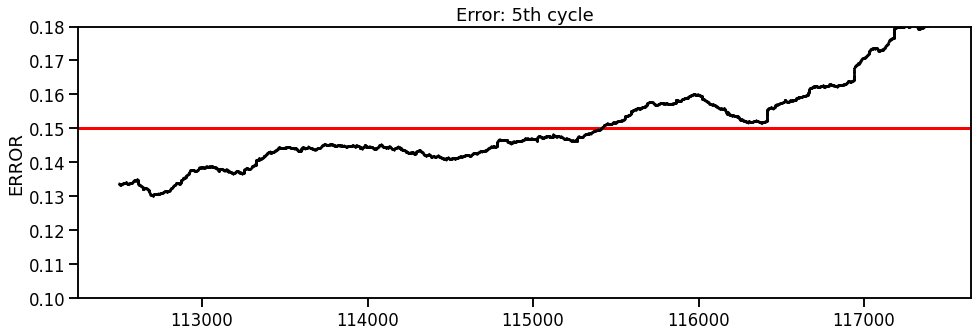

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.10,0.18)
plt.axhline(y=0.15, linewidth=3, label= 'Threshold: 0.15', color = 'r')
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 5th cycle')

### 7th cycle

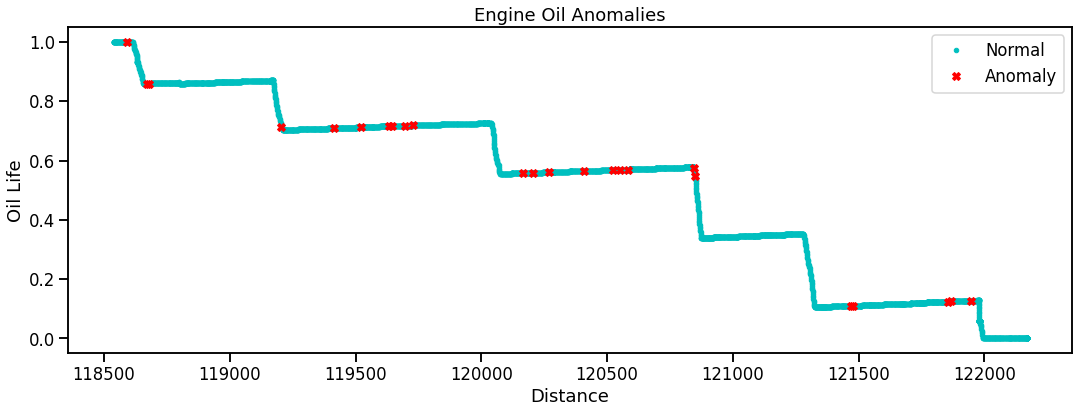

In [ ]:
sd5 = sd[sd['s22']==7]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

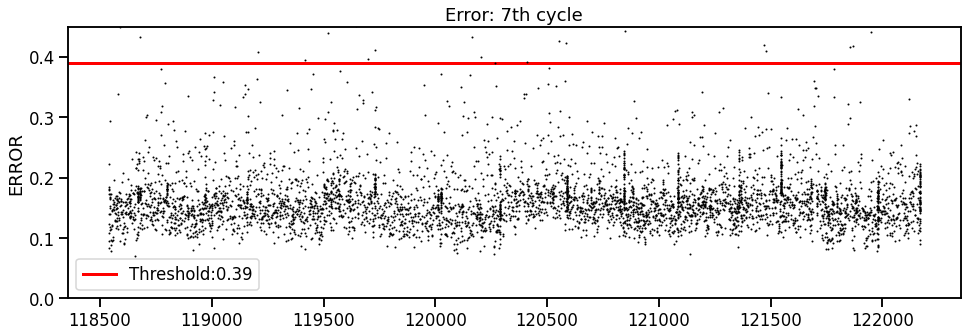

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.45)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 7th cycle')
plt.legend()

Text(0.5, 1.0, 'Error: 7th cycle')

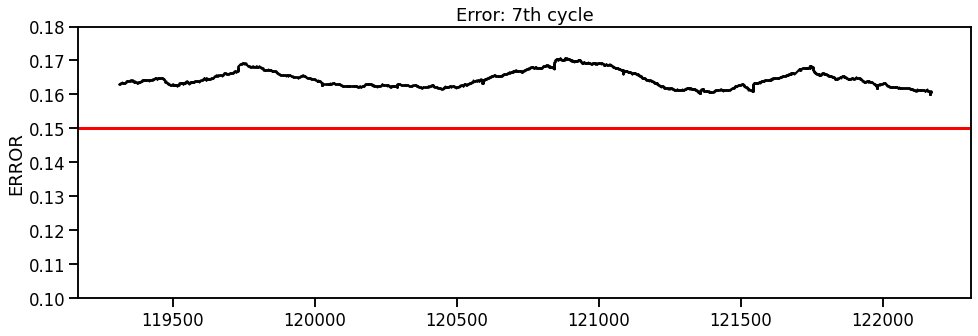

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.10,0.18)
plt.axhline(y=0.15, linewidth=3, label= 'Threshold: 0.15', color = 'r')
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('ERROR')
plt.title('Error: 7th cycle')

## Denoising Autoencoder

In [ ]:
# sd23 = sd[(sd['s22']==2) | (sd['s22']==3)]
timestep = 1
######################
sd_t = sd[(sd['s22']==2)|(sd['s22']==3) ]
######################
xt = np.array(sd_t[ sd_t['s21']>0.8 ].drop(['s17','s21','s22'], axis=1)) # Training Data
xtt = np.array(sd_t.drop(['s17','s21','s22'], axis=1))
xt.shape

(4379, 10)

In [ ]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model # for creating a Neural Network Autoencoder model
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers to DAE model
# from tensorflow.keras.utils import plot_model # for plotting model diagram


#--- Define Shapes
n_inputs=xt.shape[1] # number of input neurons = the number of features X_train

#--- Input Layer 
visible = Input(shape=(n_inputs,), name='Input-Layer') # Specify input shape

#--- Encoder Layer
e = Dense(units=n_inputs, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

#--- Middle Layer
middle = Dense(units=n_inputs, activation='linear', activity_regularizer=keras.regularizers.L1(0.0001), name='Middle-Hidden-Layer')(e)

#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(middle)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

#--- Output layer
output = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer')(d)

# Define denoising autoencoder model
model = Model(inputs=visible, outputs=output, name='Denoising-Autoencoder-Model')

# Compile denoising autoencoder model
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())

Tensorflow/Keras: 2.8.0
Model: "Denoising-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 10)]              0         
                                                                 
 Encoder-Layer (Dense)       (None, 10)                110       
                                                                 
 Encoder-Layer-Normalization  (None, 10)               40        
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 10)               0         
 eakyReLU)                                                       
                                                                 
 Middle-Hidden-Layer (Dense)  (None, 10)               110       
                                                                 
 Decoder-Layer 

In [ ]:
history = model.fit(xt, xt, epochs=50, batch_size=32, verbose=1, validation_data=(xt, xt))

Epoch 1/50
137/137 [==============================] - 2s 5ms/step - loss: 0.0677 - val_loss: 0.0574
Epoch 2/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0210 - val_loss: 0.0155
Epoch 3/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0080 - val_loss: 0.0059
Epoch 4/50
137/137 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 5/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 6/50
137/137 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 7/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/50
137/137 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 9/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 10/50
137/137 [==============================] - 1s 5ms/step - loss: 0.0030 - val_loss: 0.0026

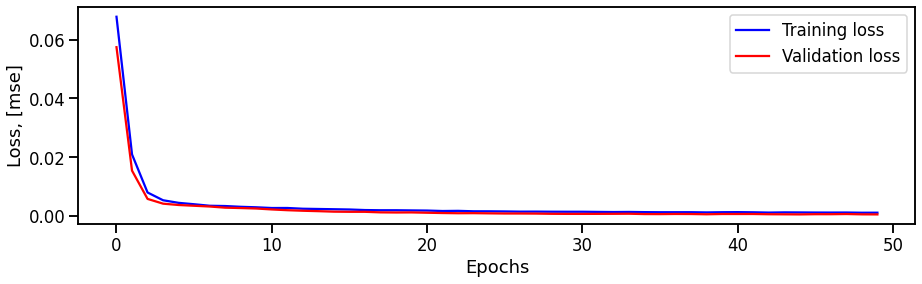

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

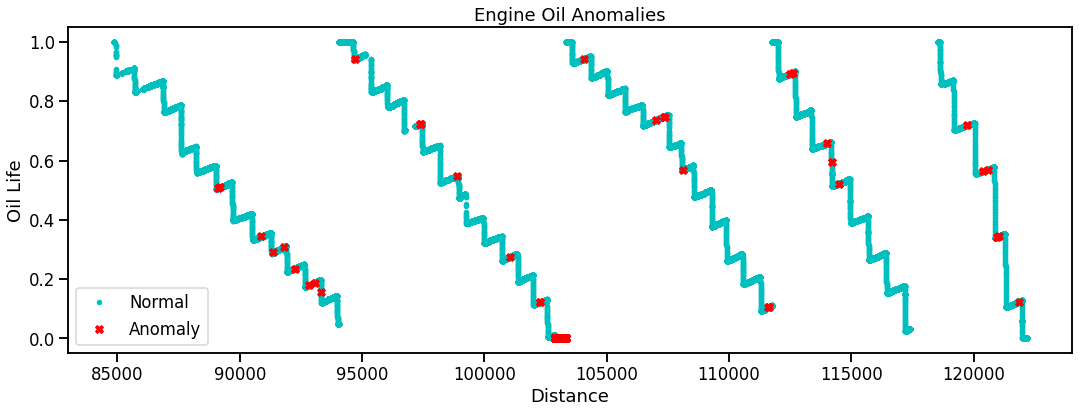

In [ ]:
X_test1 = sd.copy()
xtt = np.array(sd.drop(['s17','s21','s22'], axis=1))

X_pred = model.predict(xtt)
X_pred = X_pred.reshape((xtt.shape[0], xtt.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd['s17'], sd['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd.loc[idx]['s17'], sd.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show()

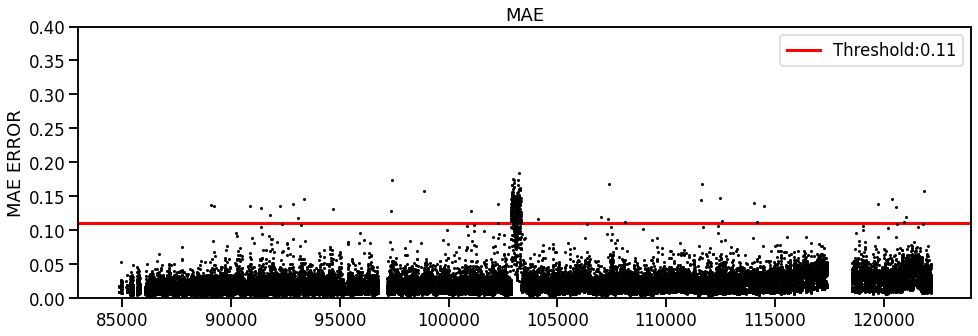

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.4)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.plot(sd['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('MAE')
plt.legend()

### 2nd cycle

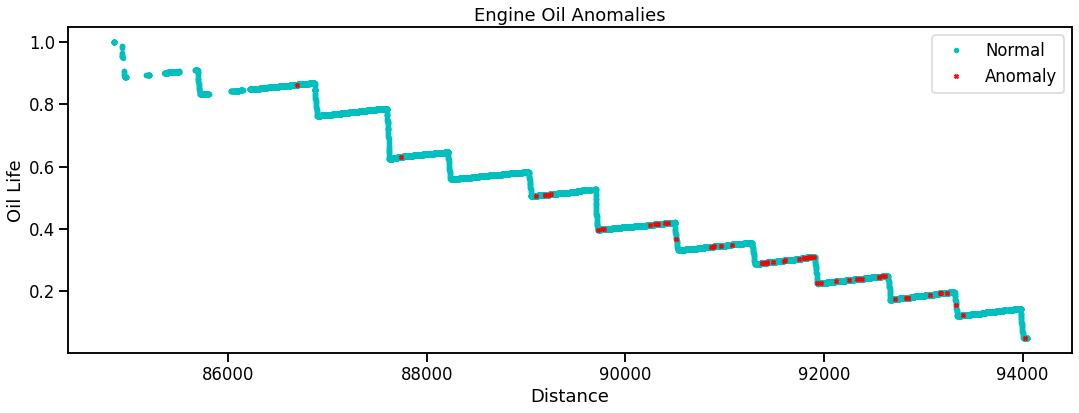

In [ ]:
sd2 = sd[(sd['s22']==2)] 

X_test1 = sd2.copy()
xtt3 = np.array(sd2.drop(['s17','s21','s22'], axis=1))
# xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd2['s17'], sd2['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd2.loc[idx]['s17'], sd2.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=4, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

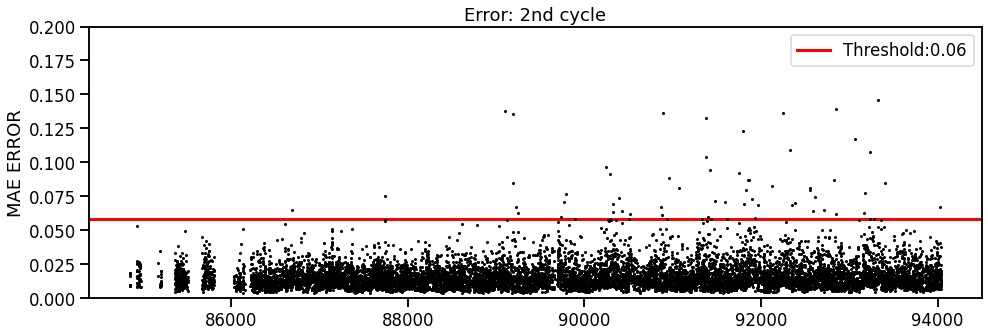

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.20)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd2['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')
plt.legend()

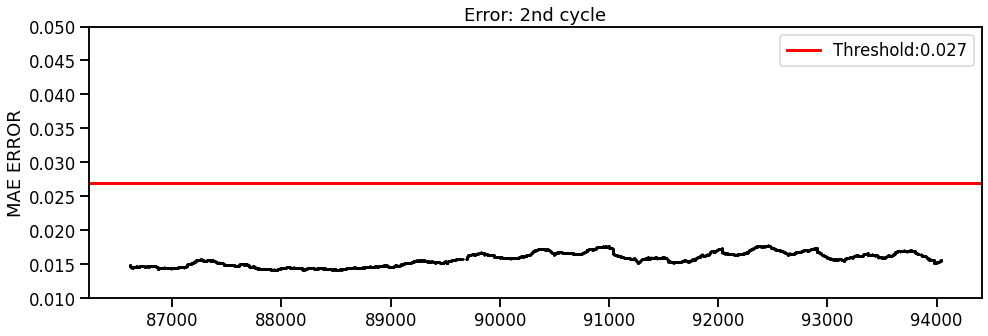

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
plt.axhline(y=0.027, linewidth=3, label= 'Threshold:0.027', color = 'r')
plt.plot(sd2['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')
plt.legend()

### 3rd cycle

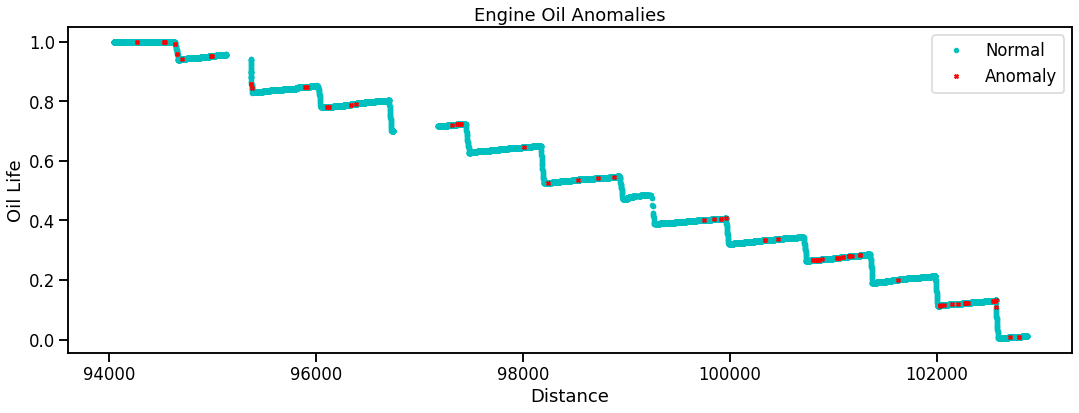

In [ ]:
sd3 = sd[(sd['s22']==3)]
timestep = 1

X_test1 = sd3.copy()
xtt3 = np.array(sd3.drop(['s17','s21','s22'], axis=1))
#xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd3['s17'], sd3['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd3.loc[idx]['s17'], sd3.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=4, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 3rd cycle')

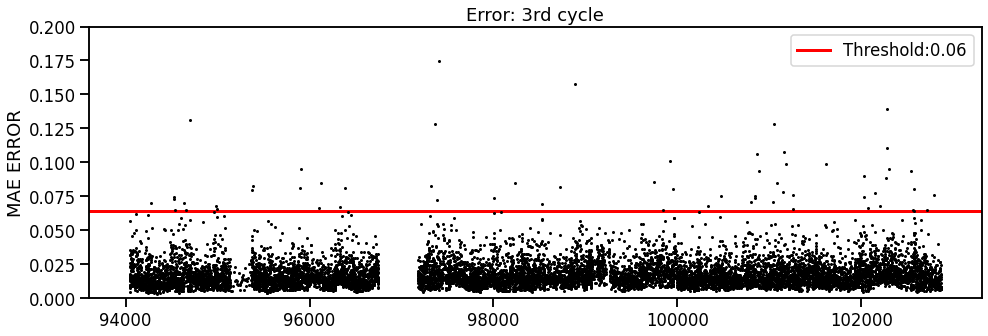

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.20)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error: 3rd cycle')

Text(0.5, 1.0, 'Error: 3rd cycle')

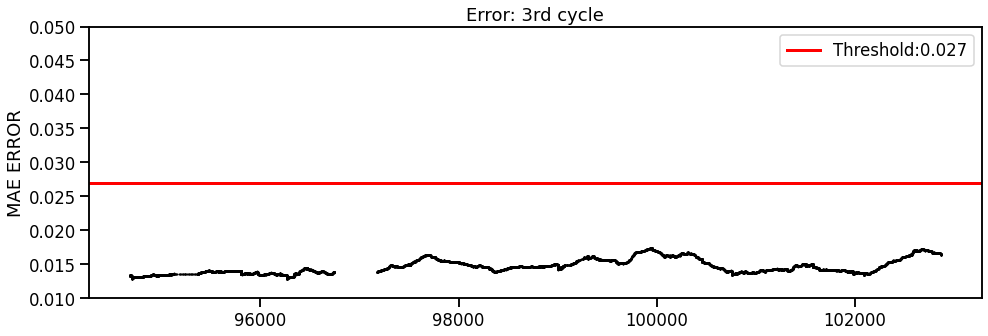

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
plt.axhline(y=0.027, linewidth=3, label= 'Threshold:0.027', color = 'r')
plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 3rd cycle')

### 4th cycle

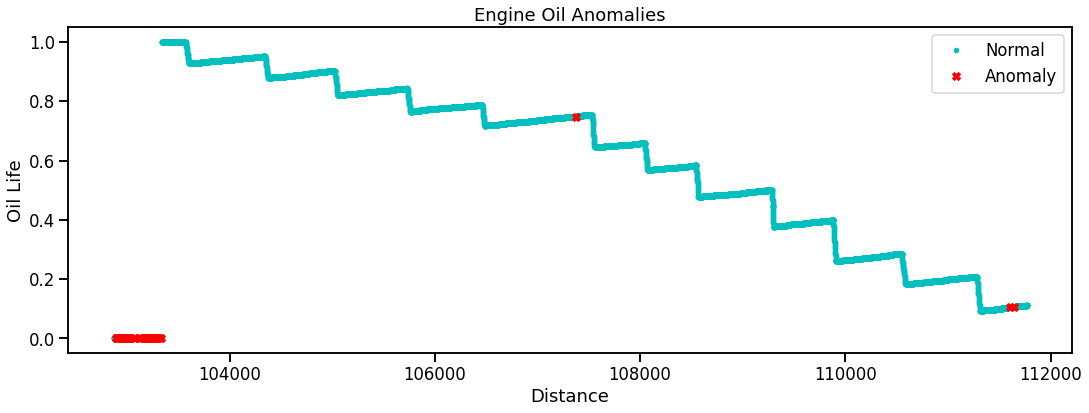

In [ ]:
sd4 = sd[sd['s22']==4]
X_test1 = sd4.copy()
xtt1 = np.array(sd4.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd4['s17'], sd4['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd4.loc[idx]['s17'], sd4.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 4th cycle')

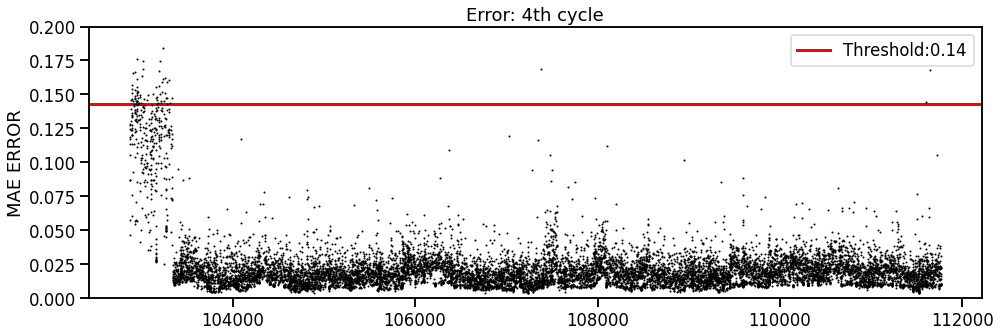

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.20)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd4['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 4th cycle')

Text(0.5, 1.0, 'Error: 4th cycle')

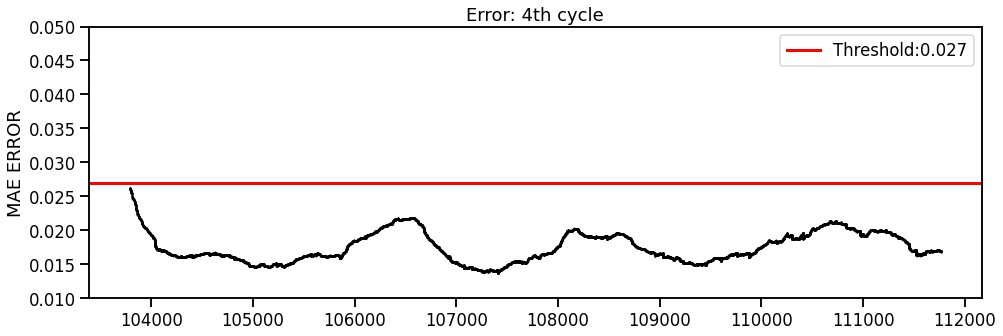

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
plt.axhline(y=0.027, linewidth=3, label= 'Threshold:0.027', color = 'r')
plt.legend()
plt.plot(sd4['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 4th cycle')

### 5th cycle

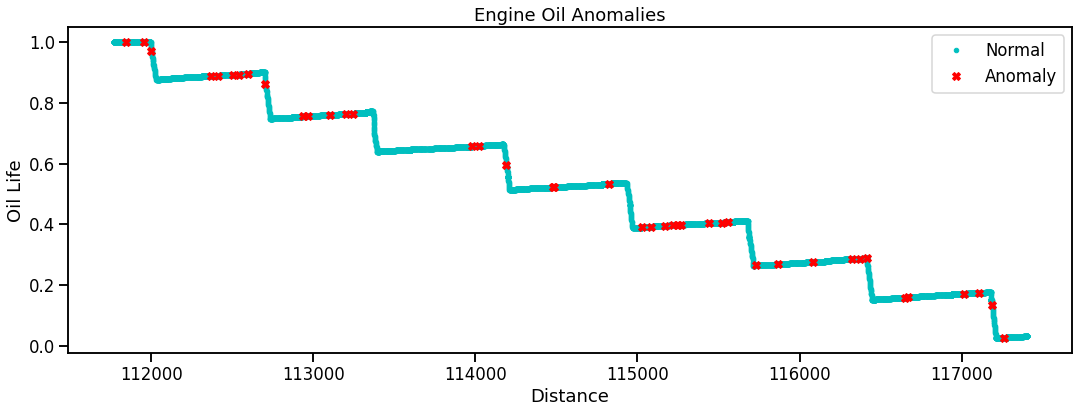

In [ ]:
sd5 = sd[sd['s22']==5]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 5th cycle')

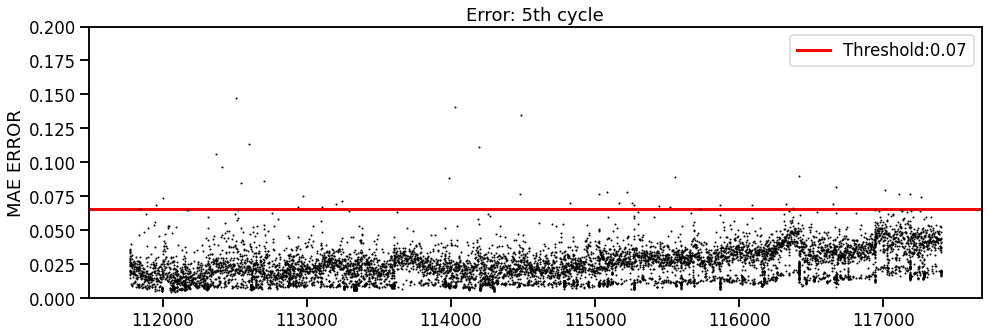

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.20)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 5th cycle')

Text(0.5, 1.0, 'Error: 5th cycle')

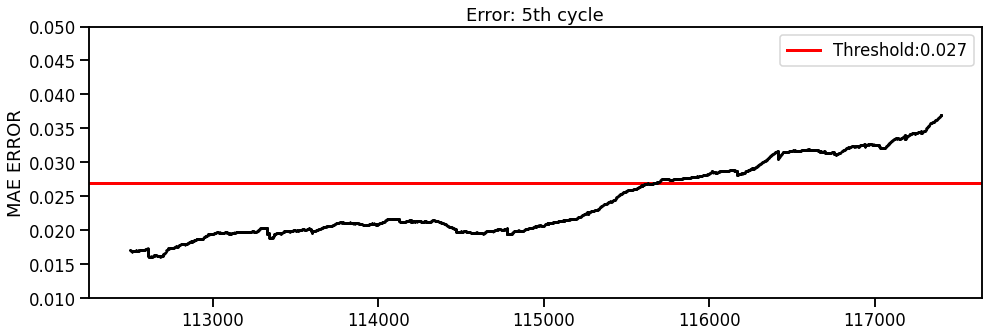

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
plt.axhline(y=0.027, linewidth=3, label= 'Threshold:0.027', color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 5th cycle')

### 7th cycle

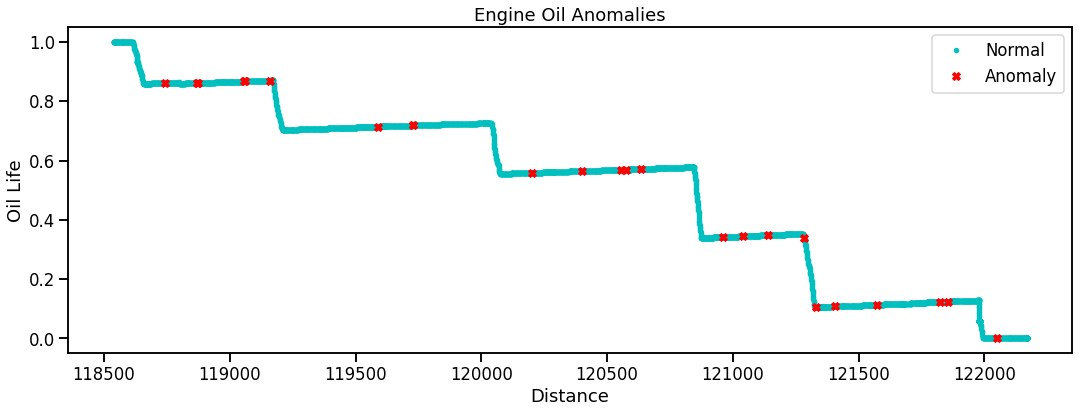

In [ ]:
sd5 = sd[sd['s22']==7]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 7th cycle')

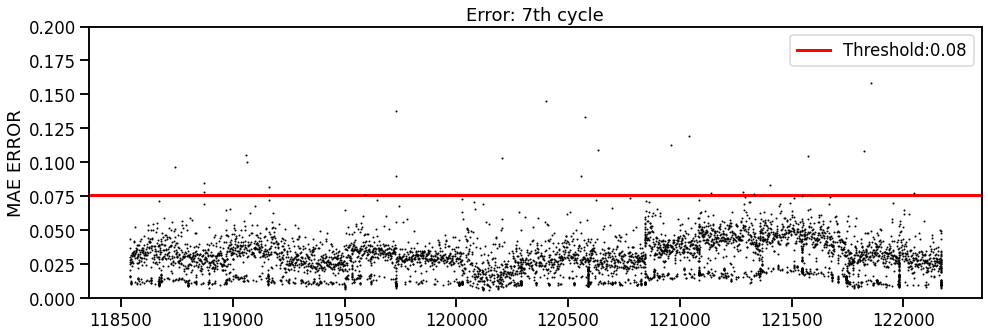

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.20)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 7th cycle')

Text(0.5, 1.0, 'Error: 7th cycle')

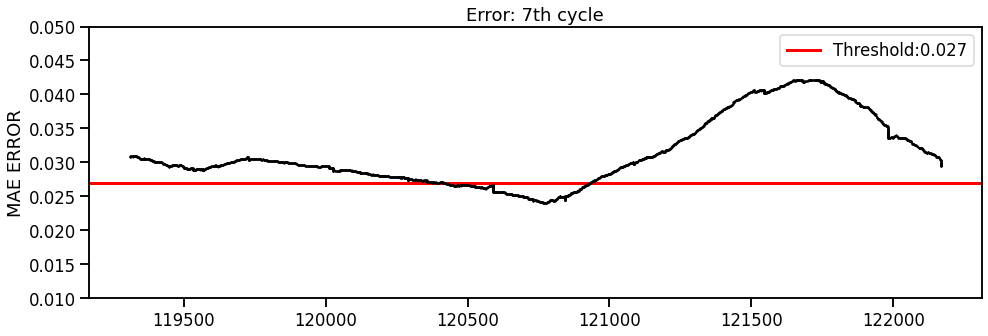

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
plt.axhline(y=0.027, linewidth=3, label= 'Threshold:0.027', color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 7th cycle')

## Deep Autoencoder

In [ ]:
import keras
from keras import layers

sd_t = sd[(sd['s22']==2) | (sd['s22']==3)]

xt = np.array(sd_t[ sd_t['s21']>0.8 ].drop(['s17','s21','s22'], axis=1)) # Training Data
# xt = xt.reshape((xt.shape[0],timestep, xt.shape[1]))
xtt = np.array(sd_t.drop(['s17','s21','s22'], axis=1))
# xtt = xtt.reshape((xtt.shape[0],timestep, xtt.shape[1]))
original_shape = xt.shape[1:]

input_shape = keras.Input(shape=original_shape)
encoded = layers.Dense(128, activation='relu')(input_shape)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(10, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_shape, decoded)
autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
history = autoencoder.fit(xt,xt,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xt, xt))

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 0.2254 - val_loss: 0.1392
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.1196 - val_loss: 0.0992
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0903 - val_loss: 0.0784
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0722 - val_loss: 0.0654
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0626 - val_loss: 0.0594
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0565 - val_loss: 0.0525
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0483 - val_loss: 0.0439
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0409 - val_loss: 0.0380
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0365 - val_loss: 0.0353
Epoch 10/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0334 - val_loss: 0.0327
Epoch 1

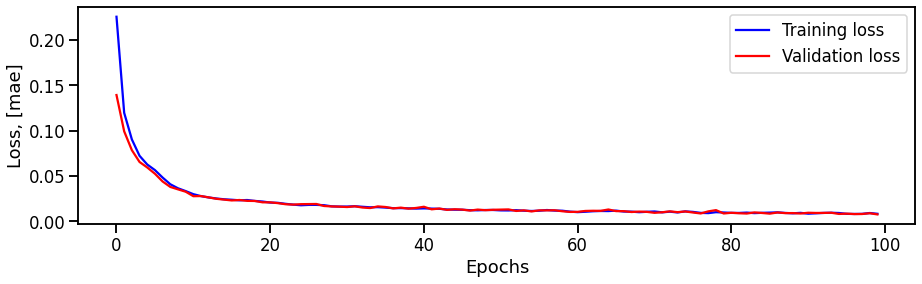

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mae]')
plt.show()

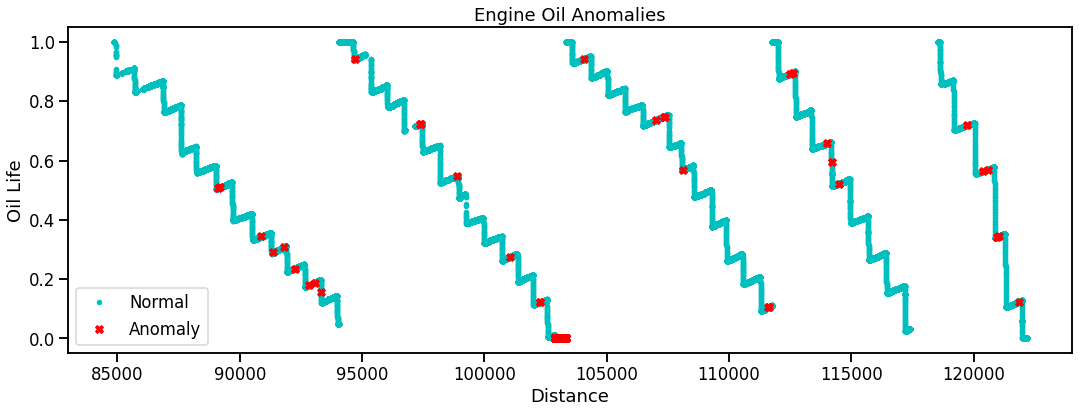

In [ ]:
X_test1 = sd.copy()
xtt = np.array(sd.drop(['s17','s21','s22'], axis=1))
# xtt = xtt.reshape((xtt.shape[0],timestep, xtt.shape[1])) # Testing Data reshaped

X_pred = model.predict(xtt)
X_pred = X_pred.reshape((xtt.shape[0], xtt.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd['s17'], sd['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd.loc[idx]['s17'], sd.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show()

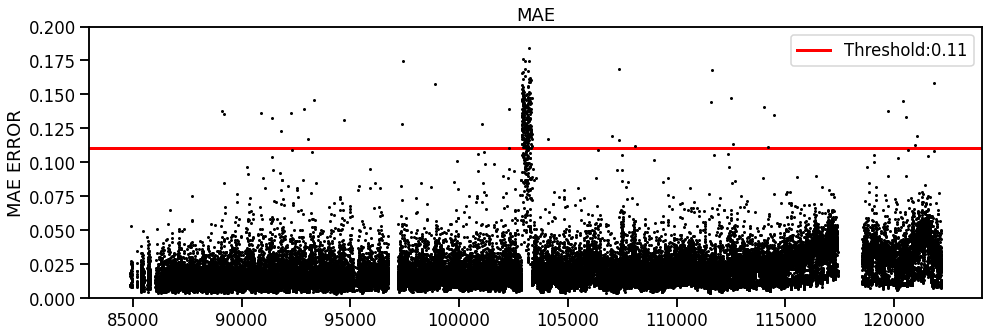

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.2)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.plot(sd['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('MAE')
plt.legend()

### 2nd cycle

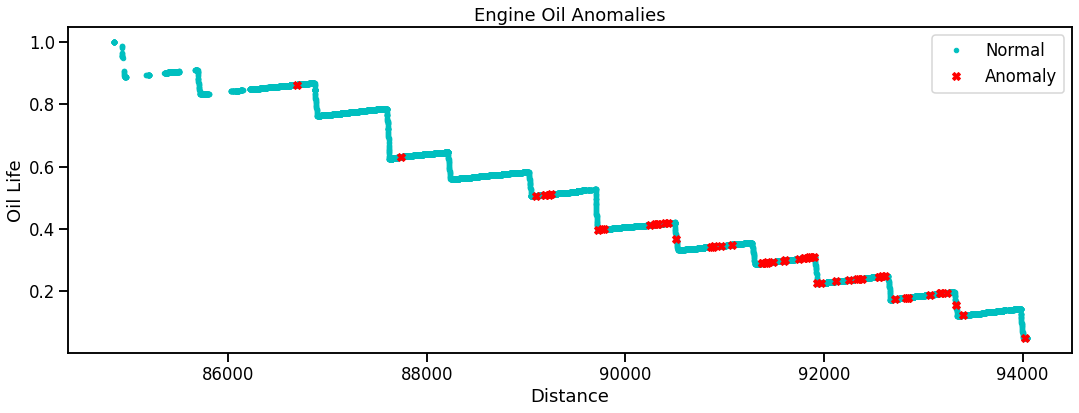

In [ ]:
sd2 = sd[(sd['s22']==2)] 

X_test1 = sd2.copy()
xtt3 = np.array(sd2.drop(['s17','s21','s22'], axis=1))
# xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd2['s17'], sd2['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd2.loc[idx]['s17'], sd2.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 2nd cycle')

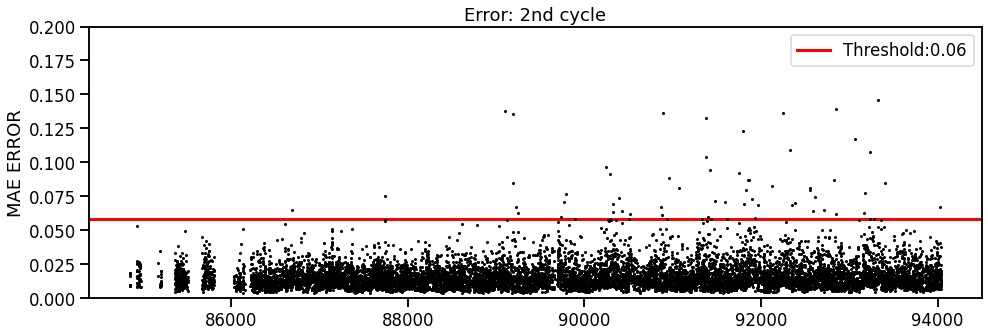

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.2)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd2['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')

Text(0.5, 1.0, 'Error: 2nd cycle')

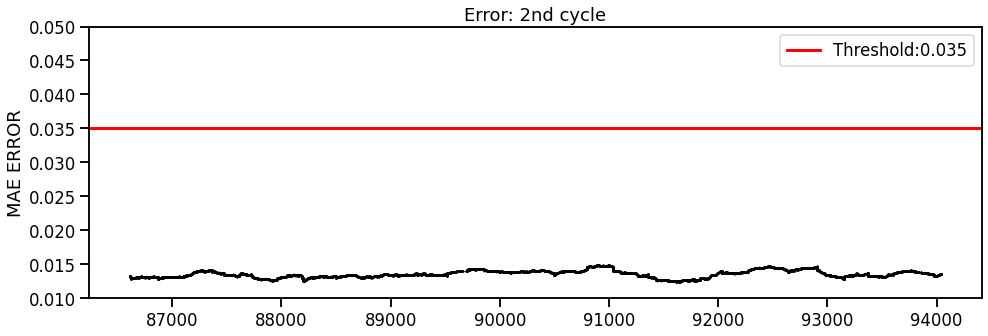

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.035, linewidth=3, label= 'Threshold:0.035', color = 'r')
plt.legend()
plt.plot(sd2['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')

### 3rd cycle

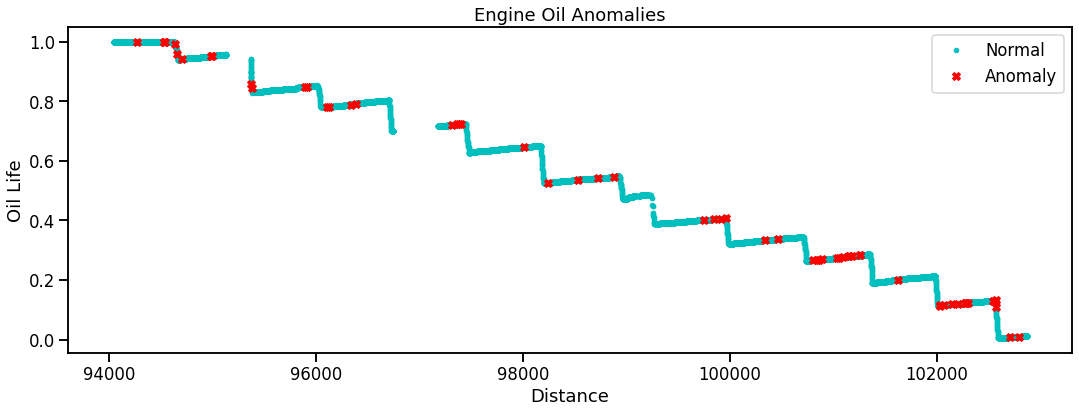

In [ ]:
sd3 = sd[(sd['s22']==3)]
timestep = 1

X_test1 = sd3.copy()
xtt3 = np.array(sd3.drop(['s17','s21','s22'], axis=1))
# xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd3['s17'], sd3['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd3.loc[idx]['s17'], sd3.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error:3rd cycle')

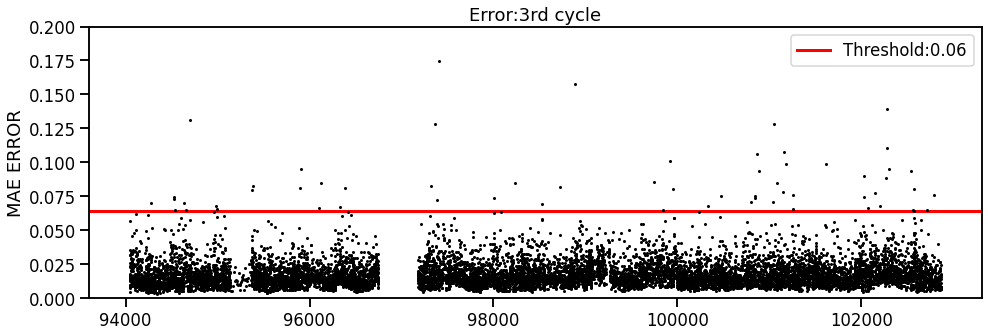

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.2)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error:3rd cycle')

Text(0.5, 1.0, 'Error:3rd cycle')

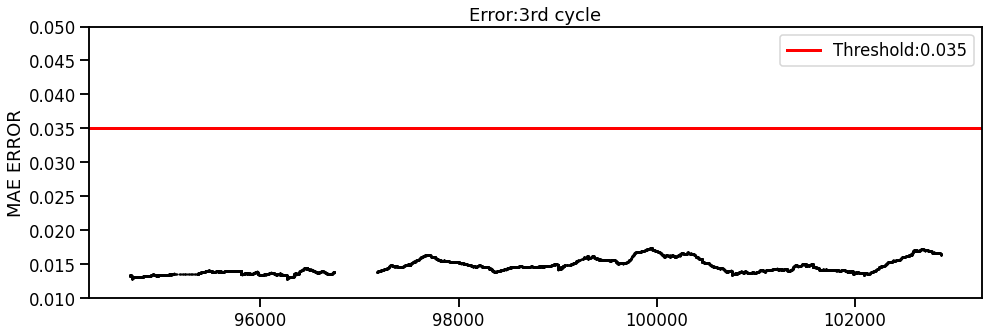

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.035, linewidth=3, label= 'Threshold:0.035', color = 'r')
plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:3rd cycle')

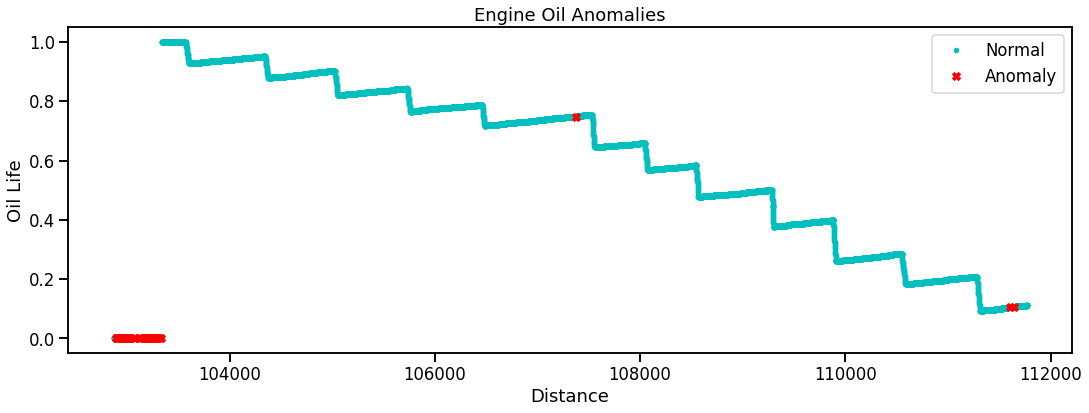

In [ ]:
sd4 = sd[sd['s22']==4]
X_test1 = sd4.copy()
xtt1 = np.array(sd4.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd4['s17'], sd4['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd4.loc[idx]['s17'], sd4.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

### 4th cycle

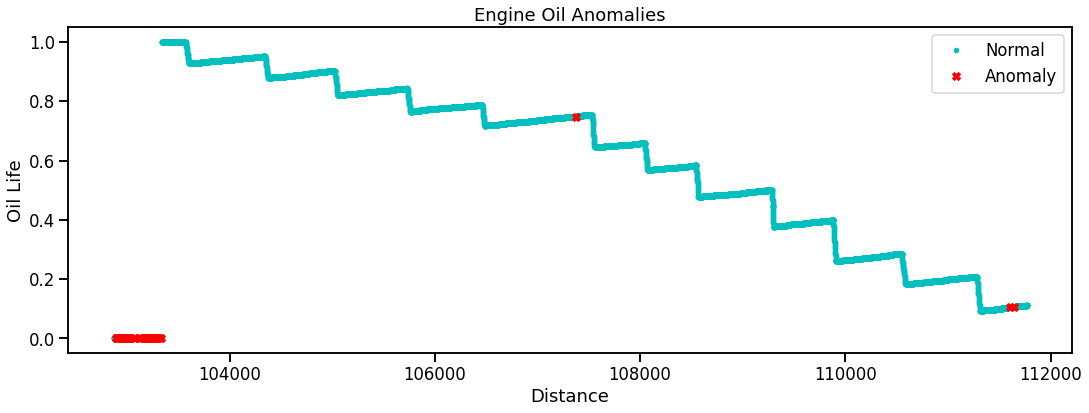

In [ ]:
sd4 = sd[sd['s22']==4]
X_test1 = sd4.copy()
xtt1 = np.array(sd4.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd4['s17'], sd4['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd4.loc[idx]['s17'], sd4.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error:4th cycle')

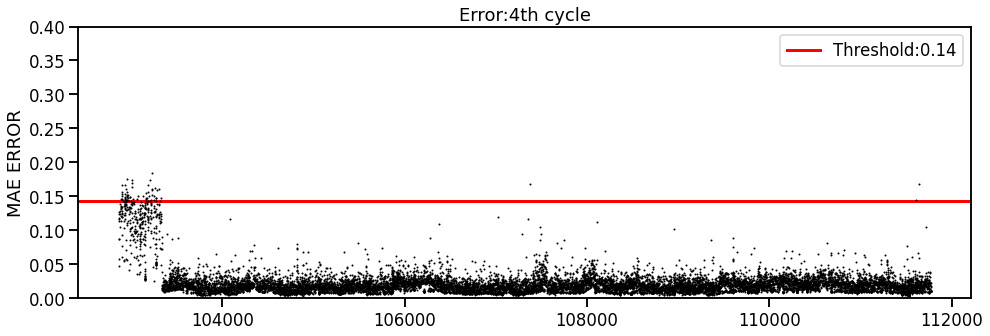

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.4)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd4['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:4th cycle')

Text(0.5, 1.0, 'Error:4th cycle')

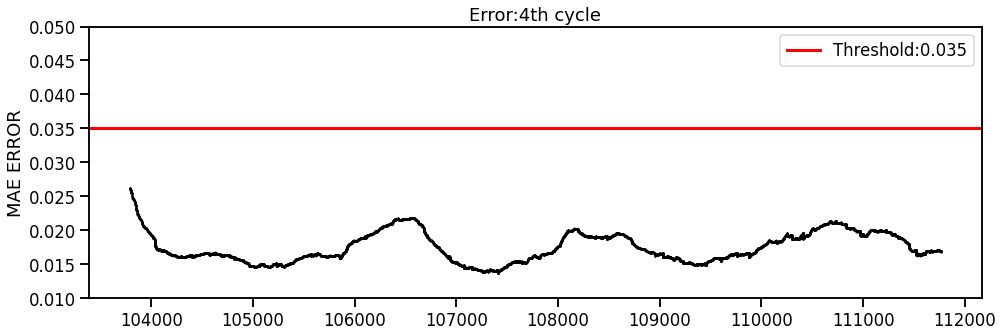

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.035, linewidth=3, label= 'Threshold:0.035', color = 'r')
plt.legend()
plt.plot(sd4['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:4th cycle')

### 5th cycle

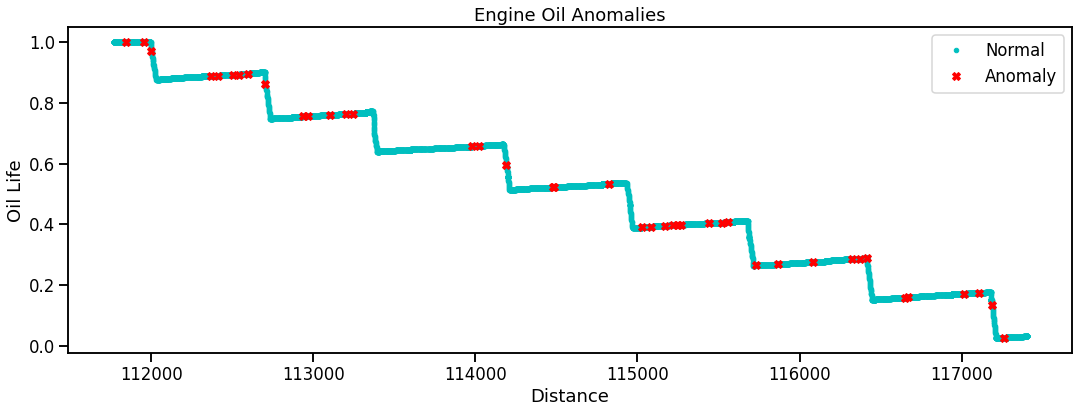

In [ ]:
sd5 = sd[sd['s22']==5]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error:5th cycle')

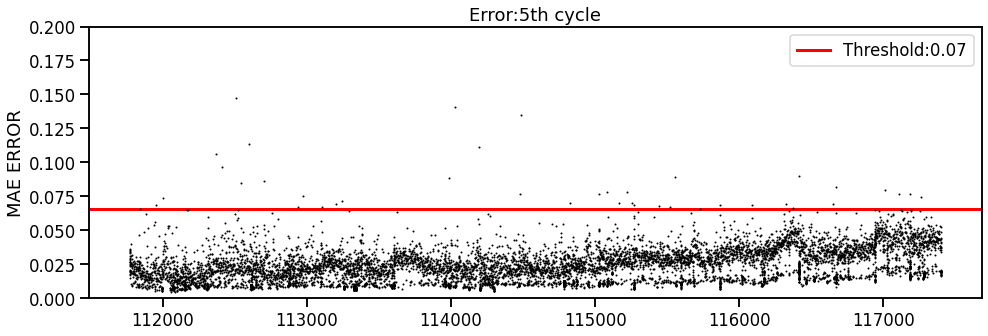

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.2)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:5th cycle')

Text(0.5, 1.0, 'Error:5th cycle')

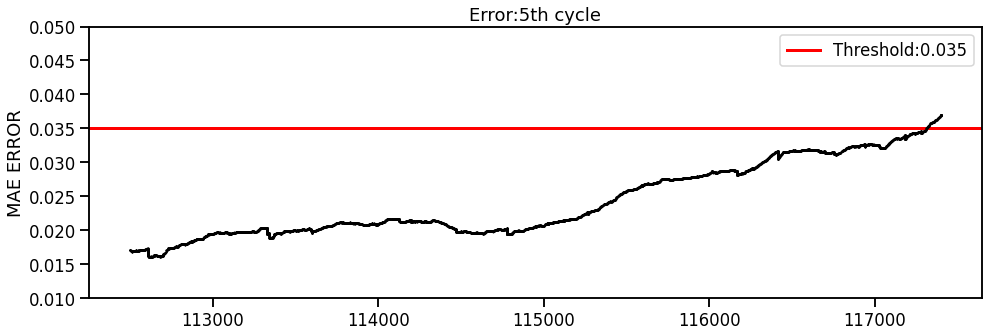

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.035, linewidth=3, label= 'Threshold:0.035', color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:5th cycle')

### 7th cycle

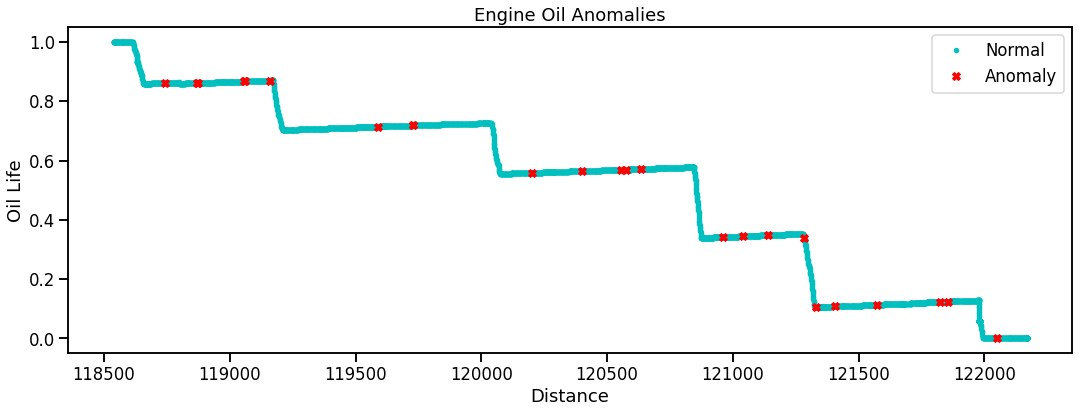

In [ ]:
sd5 = sd[sd['s22']==7]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
# xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[1]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error:7th cycle')

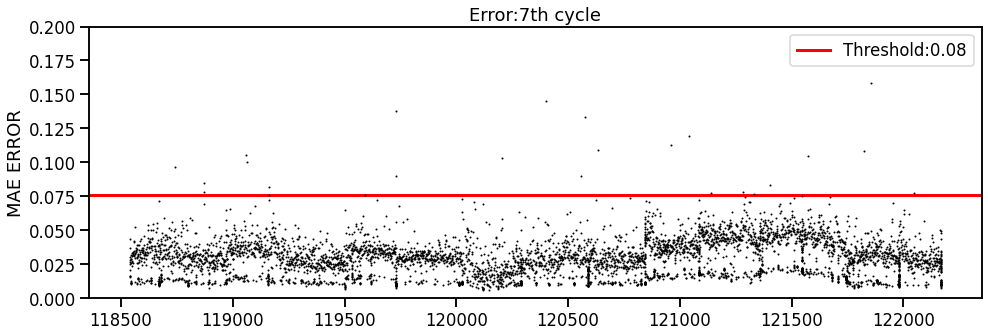

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.2)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:7th cycle')

Text(0.5, 1.0, 'Error:7th cycle')

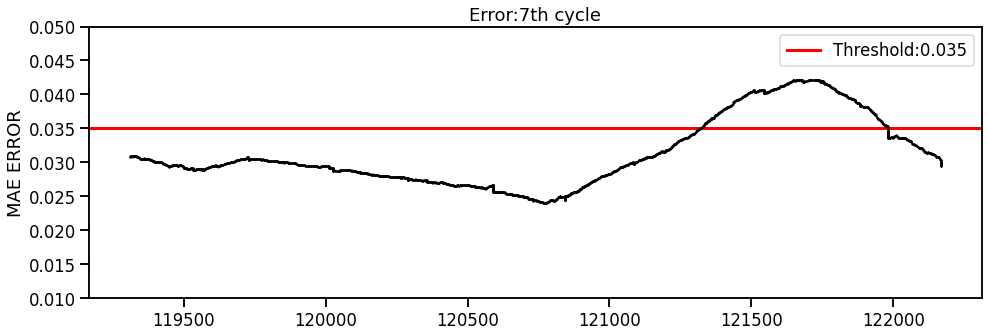

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.05)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.035, linewidth=3, label= 'Threshold:0.035', color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).median(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error:7th cycle')

## LSTM Autoencoder

In [ ]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
#timestep=

sd_t = sd[(sd['s22']==2) | (sd['s22']==3) ]

xt = np.array(sd_t[ sd_t['s21']>0.8 ].drop(['s17','s21','s22'], axis=1)) # Training Data
xt = xt.reshape((xt.shape[0],timestep, xt.shape[1]))
xtt = np.array(sd_t.drop(['s17','s21','s22'], axis=1))
xtt = xtt.reshape((xtt.shape[0],timestep, xtt.shape[1]))

In [ ]:
# reshape inputs for LSTM [samples, timesteps, features]
print("Training data shape:", xt.shape)
print("Test data shape:", xtt.shape)

Training data shape: (4379, 1, 10)
Test data shape: (24263, 1, 10)


In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
# create the autoencoder model
model = autoencoder_model(xt)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 10)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1728      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                           

In [ ]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(xt, xt, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
416/416 [==============================] - 6s 6ms/step - loss: 0.2518 - val_loss: 0.1750
Epoch 2/100
416/416 [==============================] - 2s 4ms/step - loss: 0.1348 - val_loss: 0.1069
Epoch 3/100
416/416 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1045
Epoch 4/100
416/416 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1042
Epoch 5/100
416/416 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1045
Epoch 6/100
416/416 [==============================] - 2s 5ms/step - loss: 0.1107 - val_loss: 0.1058
Epoch 7/100
416/416 [==============================] - 2s 5ms/step - loss: 0.1106 - val_loss: 0.1056
Epoch 8/100
416/416 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1044
Epoch 9/100
416/416 [==============================] - 2s 5ms/step - loss: 0.1106 - val_loss: 0.1055
Epoch 10/100
416/416 [==============================] - 2s 5ms/step - loss: 0.1106 - val_lo

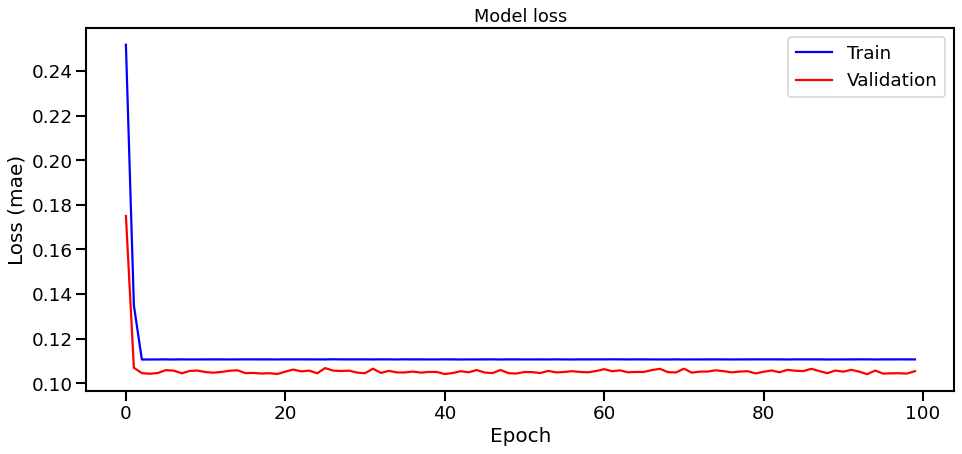

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

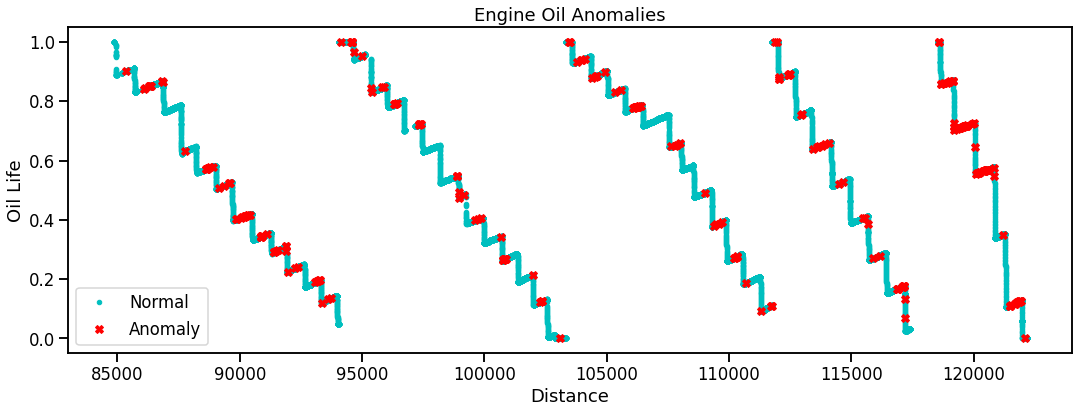

In [ ]:
X_test1 = sd.copy()
xtt = np.array(sd.drop(['s17','s21','s22'], axis=1))
xtt = xtt.reshape((xtt.shape[0],timestep, xtt.shape[1])) # Testing Data reshaped

X_pred = model.predict(xtt)
X_pred = X_pred.reshape((xtt.shape[0], xtt.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd['s17'], sd['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd.loc[idx]['s17'], sd.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'MAE')

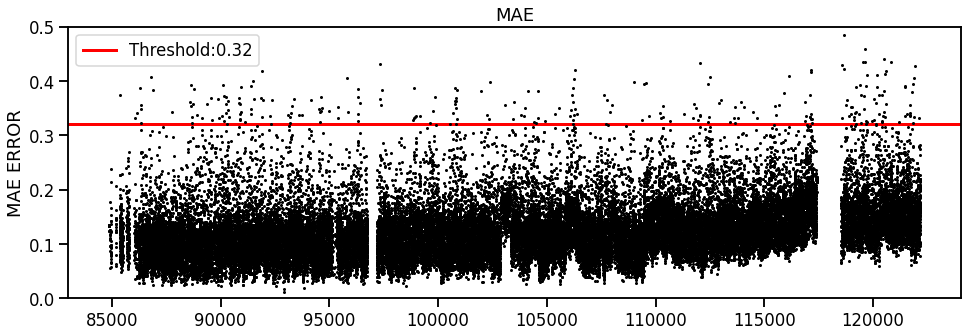

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.5)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('MAE')

### 2nd cycle

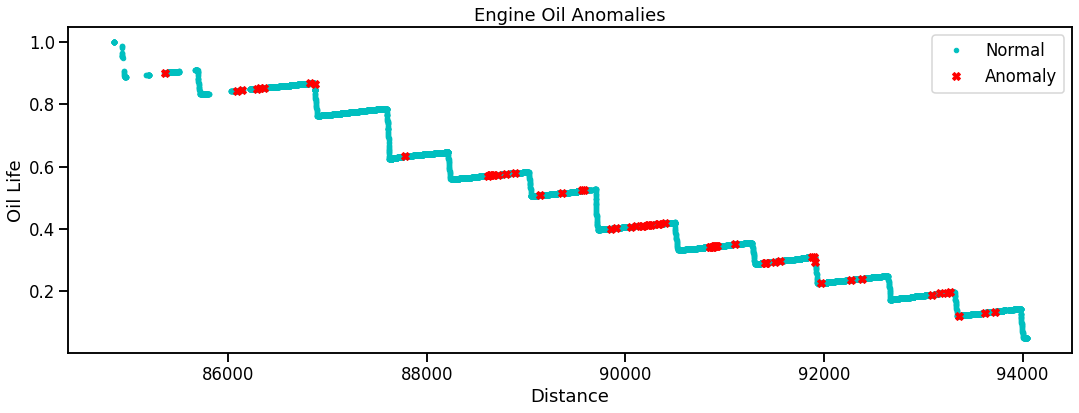

In [ ]:
sd2 = sd[(sd['s22']==2)] 

X_test1 = sd2.copy()
xtt3 = np.array(sd2.drop(['s17','s21','s22'], axis=1))
xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd2['s17'], sd2['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd2.loc[idx]['s17'], sd2.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 2nd cycle')

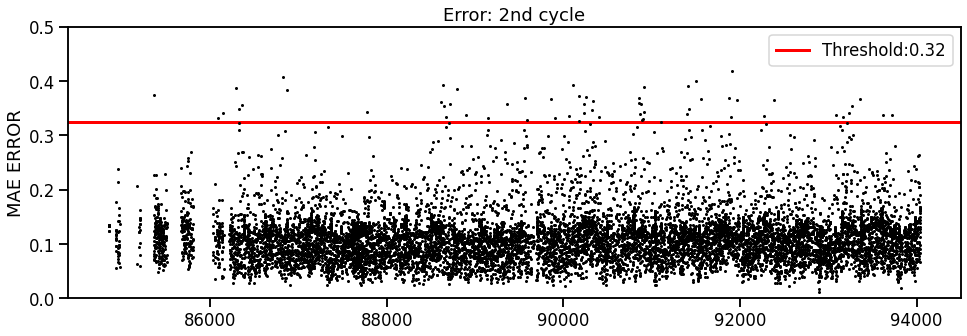

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.5)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd2['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')

Text(0.5, 1.0, 'Error: 2nd cycle')

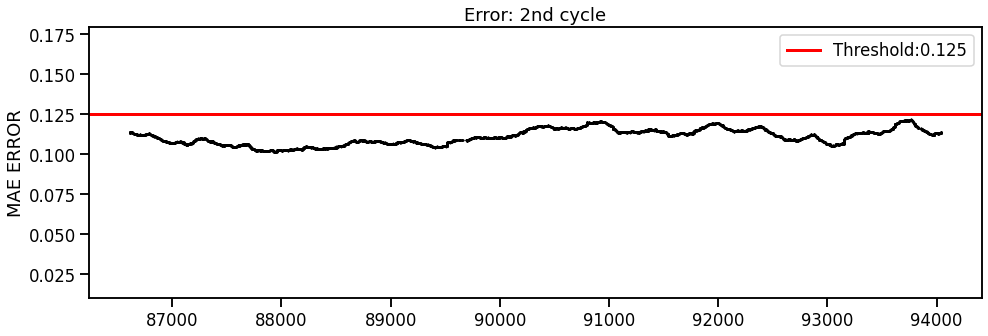

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.18)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.125, linewidth=3, label= 'Threshold:0.125', color = 'r')
plt.legend()
plt.plot(sd2['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 2nd cycle')

### 3rd cycle

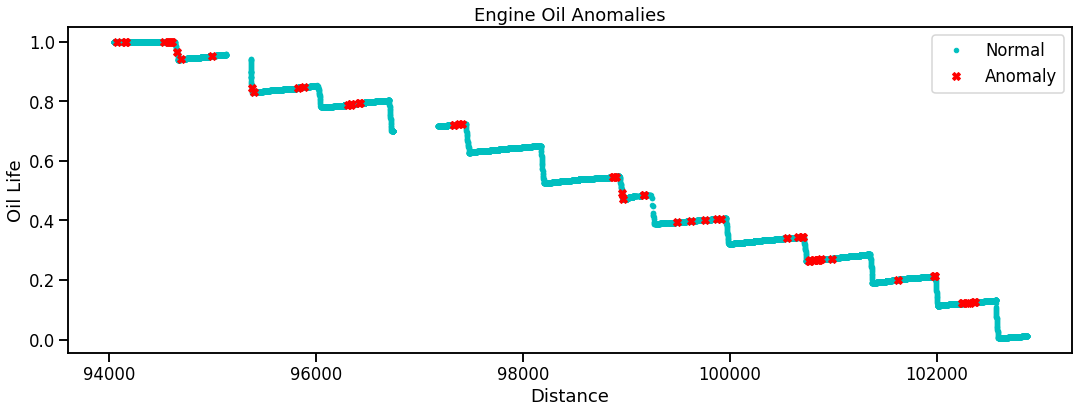

In [ ]:
sd3 = sd[(sd['s22']==3)]
timestep = 1

X_test1 = sd3.copy()
xtt3 = np.array(sd3.drop(['s17','s21','s22'], axis=1))
xtt3 = xtt3.reshape((xtt3.shape[0],timestep, xtt3.shape[1]))

X_pred = model.predict(xtt3)
X_pred = X_pred.reshape((xtt3.shape[0], xtt3.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd3['s17'], sd3['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd3.loc[idx]['s17'], sd3.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 3rd cycle')

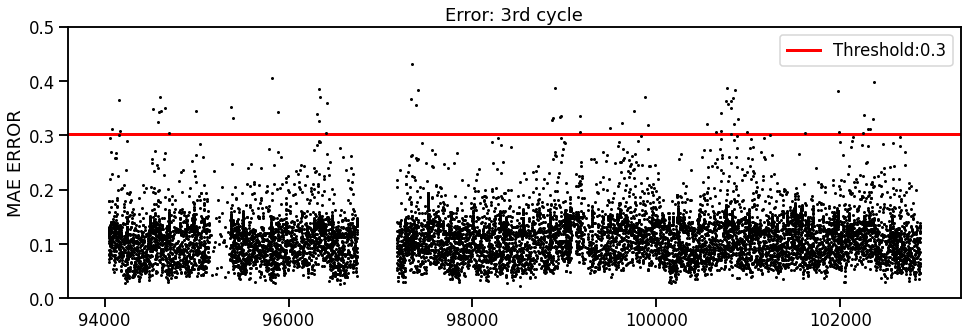

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.5)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'], '.k', markersize=4)
plt.ylabel('MAE ERROR')
plt.title('Error: 3rd cycle')

Text(0.5, 1.0, 'Error: 3rd cycle')

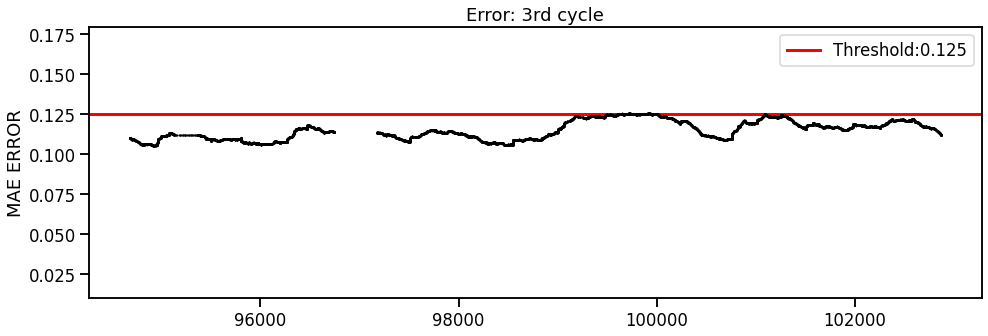

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.18)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.125, linewidth=3, label= 'Threshold:0.125', color = 'r')
plt.legend()
plt.plot(sd3['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 3rd cycle')

### 4th cycle

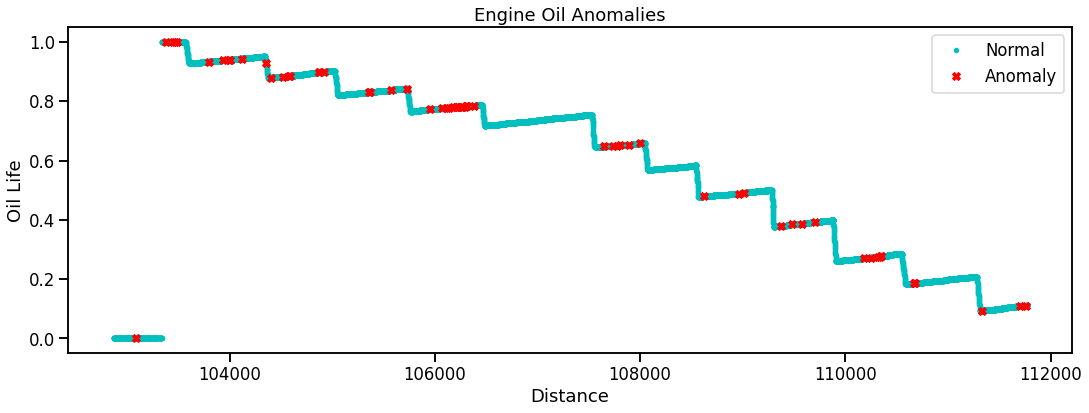

In [ ]:
sd4 = sd[sd['s22']==4]
X_test1 = sd4.copy()
xtt1 = np.array(sd4.drop(['s17','s21','s22'], axis=1))
xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd4['s17'], sd4['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd4.loc[idx]['s17'], sd4.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 4th cycle')

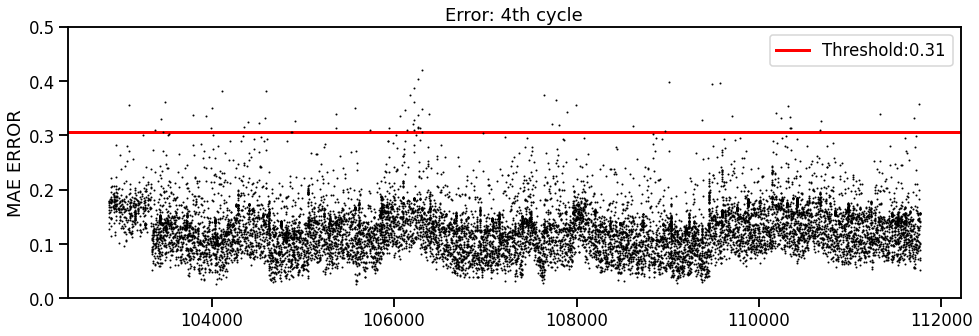

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.5)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd4['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 4th cycle')

Text(0.5, 1.0, 'Error: 4th cycle')

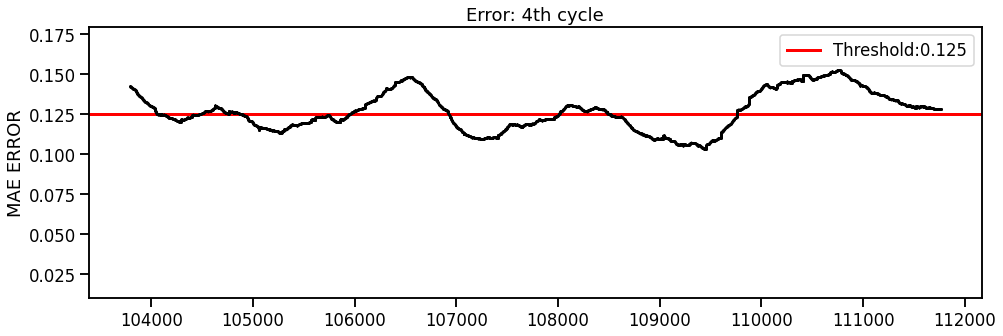

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.18)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.125, linewidth=3, label= 'Threshold:0.125', color = 'r')
plt.legend()
plt.plot(sd4['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 4th cycle')

### 5th cycle

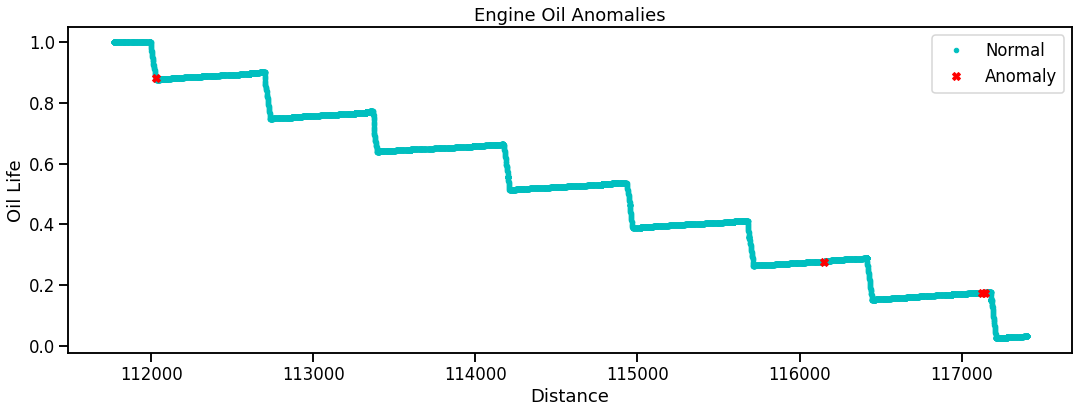

In [ ]:
sd5 = sd[sd['s22']==5]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.0005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 5th cycle')

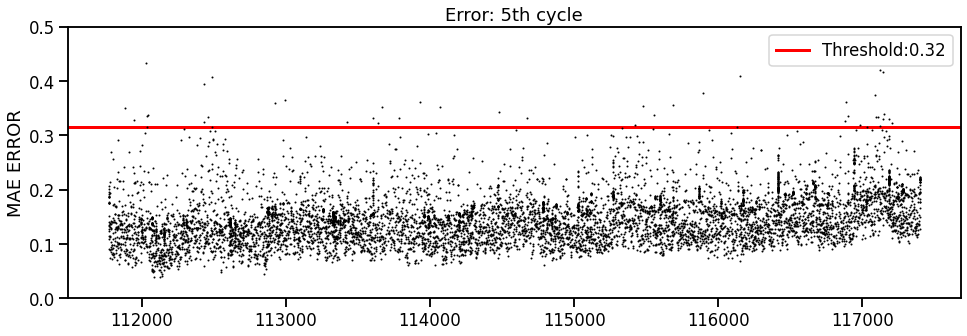

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.5)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 5th cycle')

Text(0.5, 1.0, 'Error: 5th cycle')

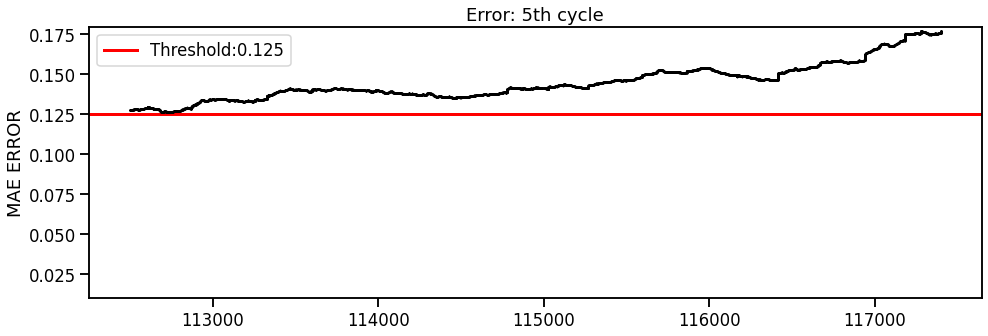

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.18)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.125, linewidth=3, label= 'Threshold:0.125', color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 5th cycle')

### 7th cycle

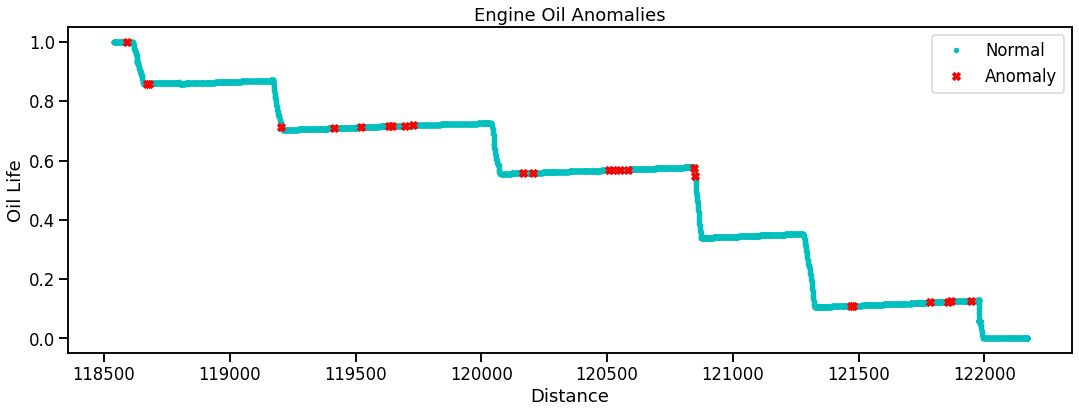

In [ ]:
sd5 = sd[sd['s22']==7]
X_test1 = sd5.copy()
xtt1 = np.array(sd5.drop(['s17','s21','s22'], axis=1))
xtt1 = xtt1.reshape((xtt1.shape[0],timestep, xtt1.shape[1]))

X_pred = model.predict(xtt1)
X_pred = X_pred.reshape((xtt1.shape[0], xtt1.shape[2]))
X_pred = pd.DataFrame(X_pred, columns=X_test1.drop(['s17','s21','s22'], axis=1).columns)
X_pred.index = X_test1.index

scored = pd.DataFrame(index=X_test1.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test1.drop(['s17','s21','s22'], axis=1)), axis = 1)

plt.figure(figsize=(18,6))
plt.plot(sd5['s17'], sd5['s21'], '.c', label='Normal')
idx = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0])).index
plt.plot(sd5.loc[idx]['s17'], sd5.loc[idx]['s21'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Oil Life')
plt.title('Engine Oil Anomalies')
plt.legend(loc='best')
plt.show();

Text(0.5, 1.0, 'Error: 7th cycle')

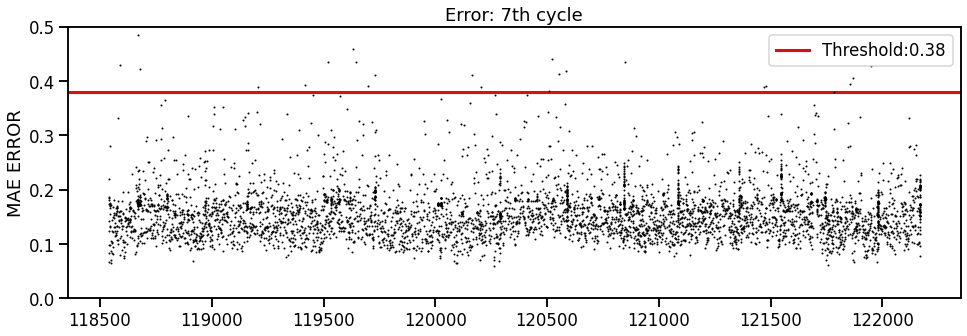

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.0,0.5)
threshold = scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=threshold, linewidth=3, label= 'Threshold:'+str(round(threshold,2)), color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'], '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 7th cycle')

Text(0.5, 1.0, 'Error: 7th cycle')

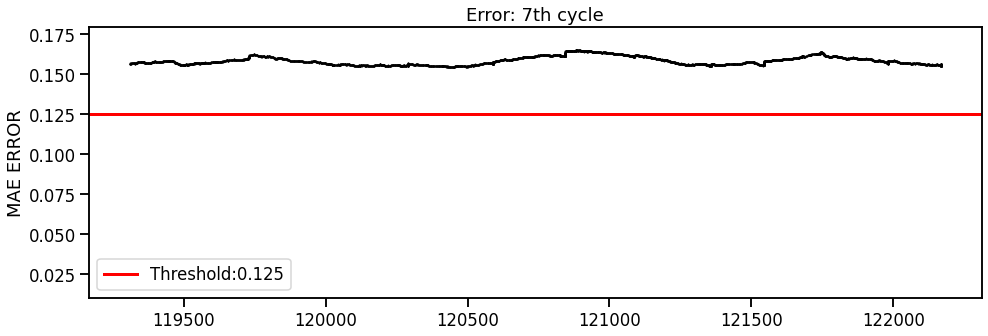

In [ ]:
plt.figure(figsize=(16,5))
plt.ylim(0.01,0.18)
# threshold = .scored['Loss_mae'].nlargest(int(0.005*scored.shape[0]))[-1]
plt.axhline(y=0.125, linewidth=3, label= 'Threshold:0.125', color = 'r')
plt.legend()
plt.plot(sd5['s17'], scored['Loss_mae'].rolling(window=1000).mean(), '.k', markersize=2)
plt.ylabel('MAE ERROR')
plt.title('Error: 7th cycle')